## Background

A real-estate investment company which specializes in flipping houses is looking to expand their operations across America. Their domain knowledge however lies primarily in Houston, TX, where they have existed and operated for over 20 years.

To expand rapidly, they won't have time to accumulate years of experience needed to master different cities markets, so they want to utilize technology to bridge that knowledge gap and quickly. Their first target market is Ames, Iowa.

In that vein, they have been able to acquire from Professor Dean De Cock over 2,927 observations of Housing sales in that city, which contains 23 nominal, 23 ordinal, 14 discrete, and 20 continuous features describing each house’s size, quality, area, age, and other miscellaneous attributes.

However, they have given us only 2,051 of these observations with sales prices and kept the remaining 878 sales prices hidden.

## Problem Statement

Our task is to utilize the given dataset to create a data analysis model. This model will be converted into an app to be used by this real estate company to determine key features that they shouldfocus on to increase the sales prices of houses they have flipped. They will judge the efficacy of the app through a Kaggle contest. Thus our main objectives are:

1. Identify the features in the Housing Data set that had the greatest positive or negative impact on Home Sales prices.

2. Deliver a data analysis model, that efficiently and accurately predicts sales prices.

### Contents:
1. Exploratory Data Analysis
2. Graphical Visualization of Raw Data
3. Feature Engineering
4. Feature Selection
5. Model Selection
6. Hyper-Tuning Analysis
7. Conclusions and Recommendations
8. Kaggle Predictions

# 1.0. Exploratory Data Analysis

### Import Python Libraries

In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import plotly.graph_objects as go

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression,  ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV 
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RepeatedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Deskewing
import scipy.stats as stats

# Warning
import warnings
warnings.filterwarnings(action='once')

### Import Datasets

In [2]:
# We load in our Test and Training Data so we can modify them simultaneously
train_df = pd.read_csv('/Users/macbook/Google Drive/0. Ofilispeaks Business (Mac and Cloud)/9. Data Science/0. Python/General Assembly Training/project_2-master/datasets/train.csv')
test_df = pd.read_csv ('/Users/macbook/Google Drive/0. Ofilispeaks Business (Mac and Cloud)/9. Data Science/0. Python/General Assembly Training/project_2-master/datasets/test.csv')

### Visually Examine Data

In [3]:
# View the training data
train_df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [4]:
# Arrange columns in alphabetical orders for easier navigation
train_df = train_df.reindex(sorted(train_df.columns), axis=1)

# Reference https://stackoverflow.com/questions/11067027/re-ordering-columns-in-pandas-dataframe-based-on-column-name

In [5]:
# Get numeric understanding of the Data
train_df.describe()

1st Flr SF   2nd Flr SF   3Ssn Porch  Bedroom AbvGr  Bsmt Full Bath  \
count  2051.000000  2051.000000  2051.000000    2051.000000     2049.000000   
mean   1164.488055   329.329108     2.591419       2.843491        0.427526   
std     396.446923   425.671046    25.229615       0.826618        0.522673   
min     334.000000     0.000000     0.000000       0.000000        0.000000   
25%     879.500000     0.000000     0.000000       2.000000        0.000000   
50%    1093.000000     0.000000     0.000000       3.000000        0.000000   
75%    1405.000000   692.500000     0.000000       3.000000        1.000000   
max    5095.000000  1862.000000   508.000000       8.000000        3.000000   

       Bsmt Half Bath  Bsmt Unf SF  BsmtFin SF 1  BsmtFin SF 2  \
count     2049.000000  2050.000000   2050.000000   2050.000000   
mean         0.063446   567.728293    442.300488     47.959024   
std          0.251705   444.954786    461.204124    165.000901   
min          0.000000     0.000000      0.000000      0.000000   
25%          0.000000   220.000000      0.000000      0.000000   
50%          0.000000   474.500000    368.000000      0.000000   
75%          0.000000   811.000000    733.750000      0.000000   
max          2.000000  2336.000000   5644.000000   1474.000000   

       Enclosed Porch  ...           PID    Pool Area      SalePrice  \
count     2051.000000  ...  2.051000e+03  2051.000000    2051.000000   
mean        22.571916  ...  7.135900e+08     2.397855  181469.701609   
std         59.845110  ...  1.886918e+08    37.782570   79258.659352   
min          0.000000  ...  5.263011e+08     0.000000   12789.000000   
25%          0.000000  ...  5.284581e+08     0.000000  129825.000000   
50%          0.000000  ...  5.354532e+08     0.000000  162500.000000   
75%          0.000000  ...  9.071801e+08     0.000000  214000.000000   
max        432.000000  ...  9.241520e+08   800.000000  611657.000000   

       Screen Porch  TotRms AbvGrd  Total Bsmt SF  Wood Deck SF   Year Built  \
count   2051.000000    2051.000000    2050.000000   2051.000000  2051.000000   
mean      16.511458       6.435885    1057.987805     93.833740  1971.708922   
std       57.374204       1.560225     449.410704    128.549416    30.177889   
min        0.000000       2.000000       0.000000      0.000000  1872.000000   
25%        0.000000       5.000000     793.000000      0.000000  1953.500000   
50%        0.000000       6.000000     994.500000      0.000000  1974.000000   
75%        0.000000       7.000000    1318.750000    168.000000  2001.000000   
max      490.000000      15.000000    6110.000000   1424.000000  2010.000000   

       Year Remod/Add      Yr Sold  
count     2051.000000  2051.000000  
mean      1984.190151  2007.775719  
std         21.036250     1.312014  
min       1950.000000  2006.000000  
25%       1964.500000  2007.000000  
50%       1993.000000  2008.000000  
75%       2004.000000  2009.000000  
max       2010.000000  2010.000000  

[8 rows x 39 columns]

In [6]:
# Describing all the Categorical Features
train_df.describe(include='all')

1st Flr SF   2nd Flr SF   3Ssn Porch Alley  Bedroom AbvGr Bldg Type  \
count   2051.000000  2051.000000  2051.000000   140    2051.000000      2051   
unique          NaN          NaN          NaN     2            NaN         5   
top             NaN          NaN          NaN  Grvl            NaN      1Fam   
freq            NaN          NaN          NaN    85            NaN      1700   
mean    1164.488055   329.329108     2.591419   NaN       2.843491       NaN   
std      396.446923   425.671046    25.229615   NaN       0.826618       NaN   
min      334.000000     0.000000     0.000000   NaN       0.000000       NaN   
25%      879.500000     0.000000     0.000000   NaN       2.000000       NaN   
50%     1093.000000     0.000000     0.000000   NaN       3.000000       NaN   
75%     1405.000000   692.500000     0.000000   NaN       3.000000       NaN   
max     5095.000000  1862.000000   508.000000   NaN       8.000000       NaN   

       Bsmt Cond Bsmt Exposure  Bsmt Full Bath  Bsmt Half Bath  ...  \
count       1996          1993     2049.000000     2049.000000  ...   
unique         5             4             NaN             NaN  ...   
top           TA            No             NaN             NaN  ...   
freq        1834          1339             NaN             NaN  ...   
mean         NaN           NaN        0.427526        0.063446  ...   
std          NaN           NaN        0.522673        0.251705  ...   
min          NaN           NaN        0.000000        0.000000  ...   
25%          NaN           NaN        0.000000        0.000000  ...   
50%          NaN           NaN        0.000000        0.000000  ...   
75%          NaN           NaN        1.000000        0.000000  ...   
max          NaN           NaN        3.000000        2.000000  ...   

            SalePrice  Screen Porch  Street  TotRms AbvGrd Total Bsmt SF  \
count     2051.000000   2051.000000    2051    2051.000000   2050.000000   
unique            NaN           NaN       2            NaN           NaN   
top               NaN           NaN    Pave            NaN           NaN   
freq              NaN           NaN    2044            NaN           NaN   
mean    181469.701609     16.511458     NaN       6.435885   1057.987805   
std      79258.659352     57.374204     NaN       1.560225    449.410704   
min      12789.000000      0.000000     NaN       2.000000      0.000000   
25%     129825.000000      0.000000     NaN       5.000000    793.000000   
50%     162500.000000      0.000000     NaN       6.000000    994.500000   
75%     214000.000000      0.000000     NaN       7.000000   1318.750000   
max     611657.000000    490.000000     NaN      15.000000   6110.000000   

       Utilities Wood Deck SF   Year Built Year Remod/Add      Yr Sold  
count       2051  2051.000000  2051.000000    2051.000000  2051.000000  
unique         3          NaN          NaN            NaN          NaN  
top       AllPub          NaN          NaN            NaN          NaN  
freq        2049          NaN          NaN            NaN          NaN  
mean         NaN    93.833740  1971.708922    1984.190151  2007.775719  
std          NaN   128.549416    30.177889      21.036250     1.312014  
min          NaN     0.000000  1872.000000    1950.000000  2006.000000  
25%          NaN     0.000000  1953.500000    1964.500000  2007.000000  
50%          NaN     0.000000  1974.000000    1993.000000  2008.000000  
75%          NaN   168.000000  2001.000000    2004.000000  2009.000000  
max          NaN  1424.000000  2010.000000    2010.000000  2010.000000  

[11 rows x 81 columns]

In [7]:
train_df.shape

(2051, 81)

### Check DataTypes and Missing Values

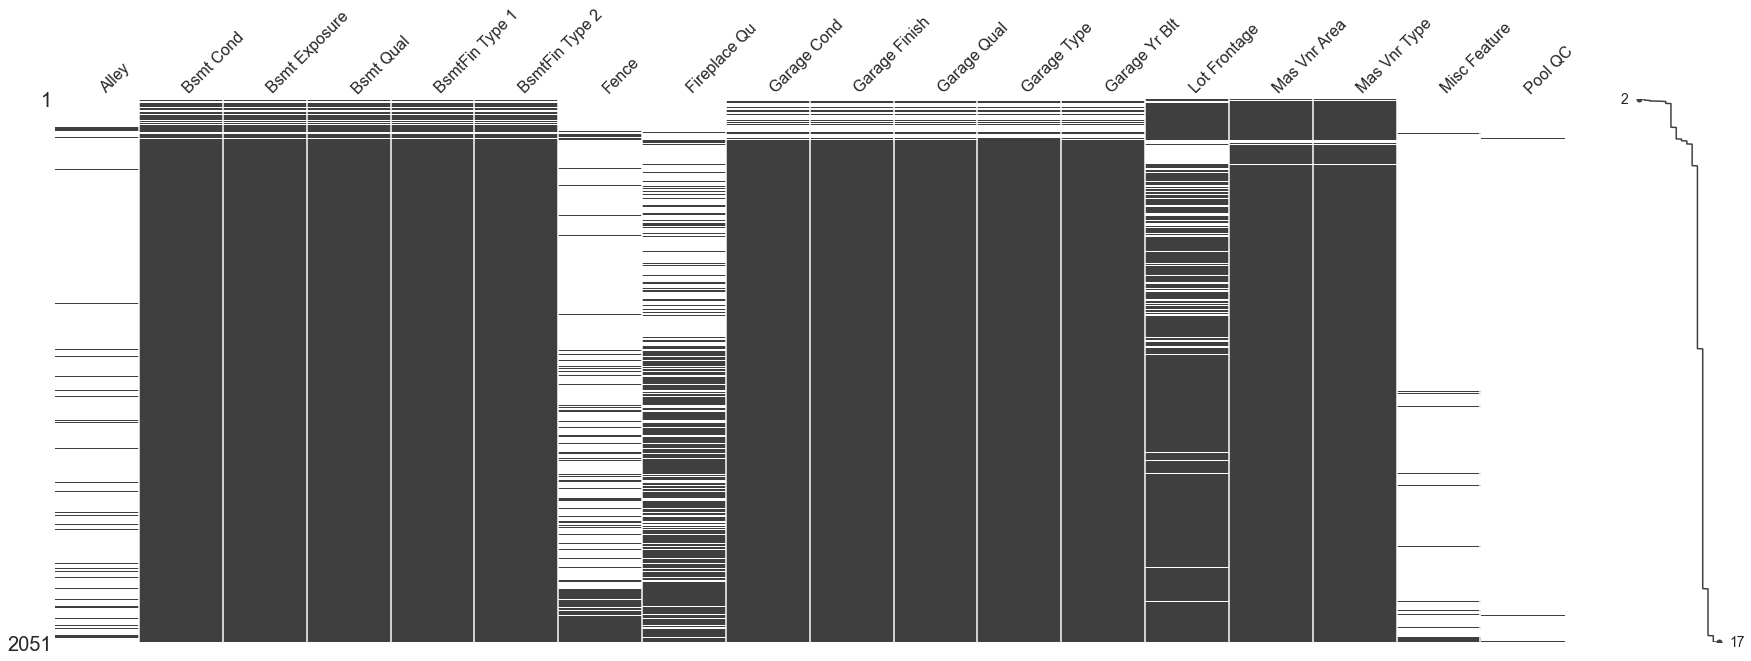

In [8]:
# Showing values with more than 1% of data missing
missingno.matrix(train_df, figsize = (30,10), filter='bottom',n=20, p=0.99, sort='ascending')

In [9]:
train_df.info(verbose=True)
# Check for data types and null values
# https://stackoverflow.com/questions/23168416/pandas-printing-all-dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1st Flr SF       2051 non-null   int64  
 1   2nd Flr SF       2051 non-null   int64  
 2   3Ssn Porch       2051 non-null   int64  
 3   Alley            140 non-null    object 
 4   Bedroom AbvGr    2051 non-null   int64  
 5   Bldg Type        2051 non-null   object 
 6   Bsmt Cond        1996 non-null   object 
 7   Bsmt Exposure    1993 non-null   object 
 8   Bsmt Full Bath   2049 non-null   float64
 9   Bsmt Half Bath   2049 non-null   float64
 10  Bsmt Qual        1996 non-null   object 
 11  Bsmt Unf SF      2050 non-null   float64
 12  BsmtFin SF 1     2050 non-null   float64
 13  BsmtFin SF 2     2050 non-null   float64
 14  BsmtFin Type 1   1996 non-null   object 
 15  BsmtFin Type 2   1995 non-null   object 
 16  Central Air      2051 non-null   object 
 17  Condition 1   

**Check for Unique Values in Each Column of Ames, Iowa Housing dataset**

In [10]:
for column in reversed(train_df.columns):
# Shift through the column names with a For loop
    
    columnSeriesObj = train_df[column].unique()
    # Get unique values in columns
    
    coltype = train_df[column].dtype
    # Get column data types
    
    if len(train_df[column].unique()) <13:
    # Pull for columns with unique values less than 13
        
        print(f'{column} ({coltype}): {columnSeriesObj}')

Yr Sold (int64): [2010 2009 2006 2007 2008]
Utilities (object): ['AllPub' 'NoSeWa' 'NoSewr']
Street (object): ['Pave' 'Grvl']
Sale Type (object): ['WD ' 'New' 'COD' 'ConLD' 'Con' 'CWD' 'Oth' 'ConLI' 'ConLw']
Roof Style (object): ['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
Roof Matl (object): ['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'ClyTile']
Pool QC (object): [nan 'Fa' 'Gd' 'Ex' 'TA']
Pool Area (int64): [  0 519 576 800 228 480 648 738 368 561]
Paved Drive (object): ['Y' 'N' 'P']
Overall Qual (int64): [ 6  7  5  8 10  4  9  3  2  1]
Overall Cond (int64): [8 5 7 6 3 9 2 4 1]
Mo Sold (int64): [ 3  4  1  6  5  9  7  2 12 10 11  8]
Misc Feature (object): [nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']
Mas Vnr Type (object): ['BrkFace' 'None' nan 'Stone' 'BrkCmn']
MS Zoning (object): ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
Lot Shape (object): ['IR1' 'Reg' 'IR2' 'IR3']
Lot Config (object): ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
Land Slope (object): ['Gtl' 'Sev' 'Mod'

# 2.0 Graphs and Visualization

### 2.0.1 Graphically Visualize Data

In [11]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        
        if dataset.dtypes[column] == np.object:# If it is a string or float
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
            
        else:
            g = sns.histplot(dataset[column])
            plt.xticks(rotation=25)
    
# reference https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb

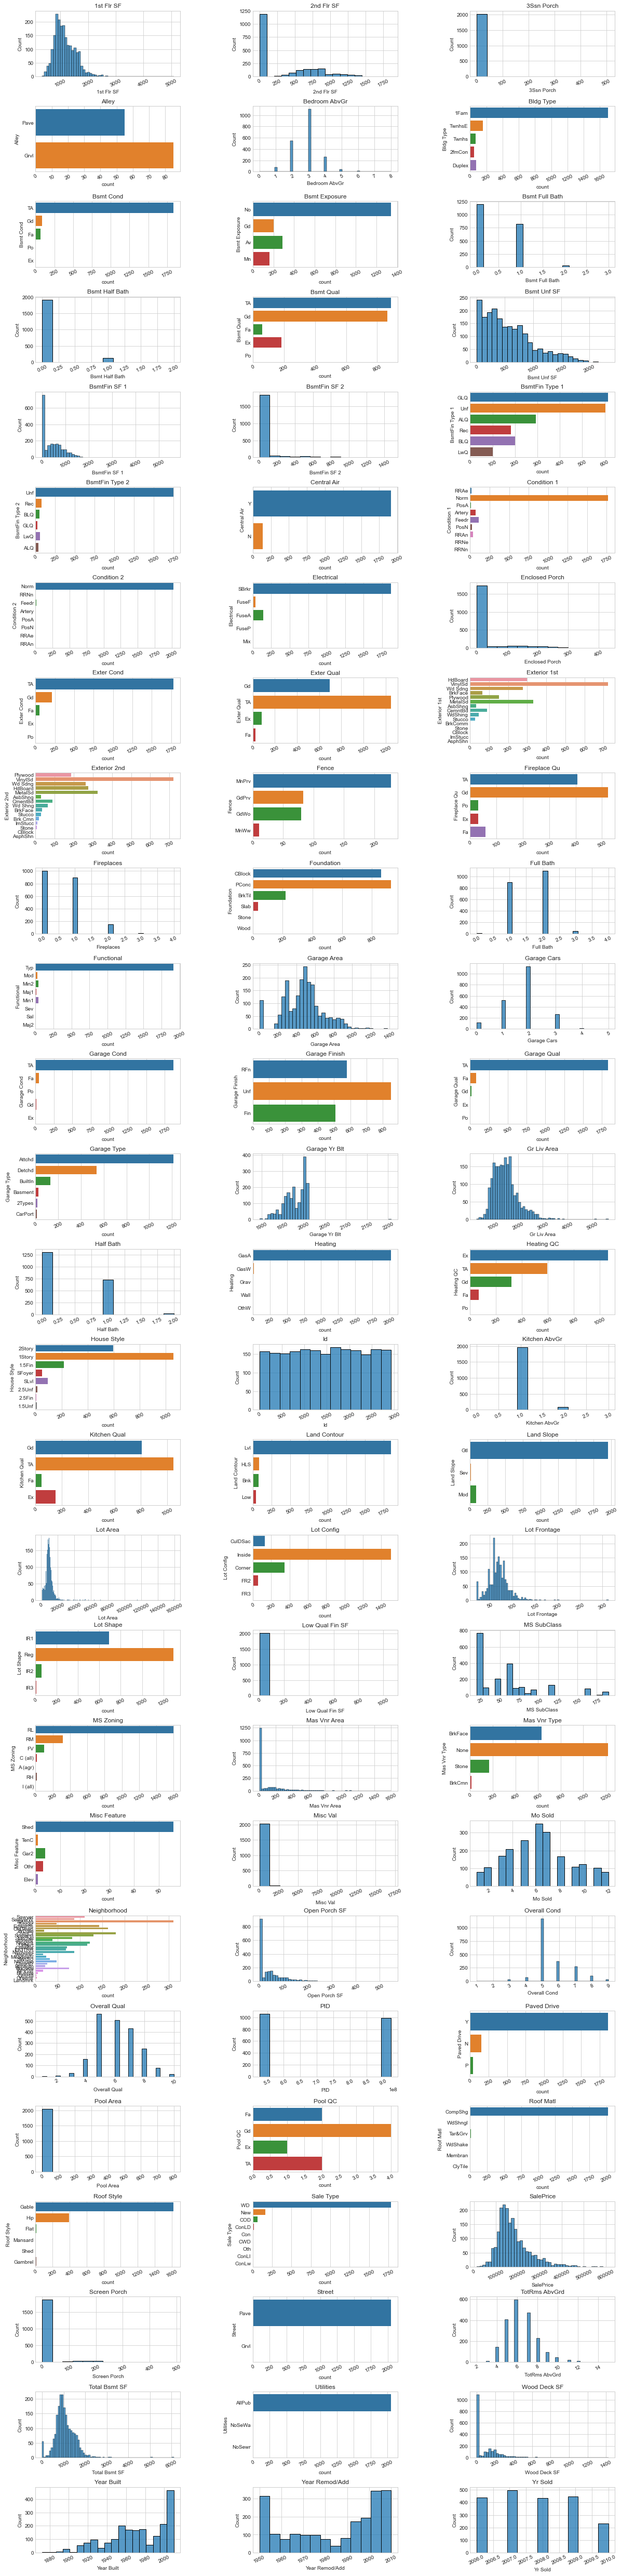

In [12]:
plot_distribution(train_df, cols=3, width=20, height=90, hspace=0.45, wspace=0.5)

**NOTE:** From the above graphs, we observe some skew in the data, particularly the Sales Price our target features. Being that we are likely utilizing algorithms that perform better on Normally Distributed data, we might have to apply Log transformations on the skewed data.

---


In [13]:
# Let’s plot the distribution of each feature against the Sales price
def plot_distribution_comp(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        
        if dataset.dtypes[column] == np.object:# If it is a string or float
            g = sns.violinplot(x=column,y=train_df['SalePrice'], data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
            
        else:
            g = sns.scatterplot(x = dataset[column], y = train_df['SalePrice'])
            plt.xticks(rotation=25)
    
# reference https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb

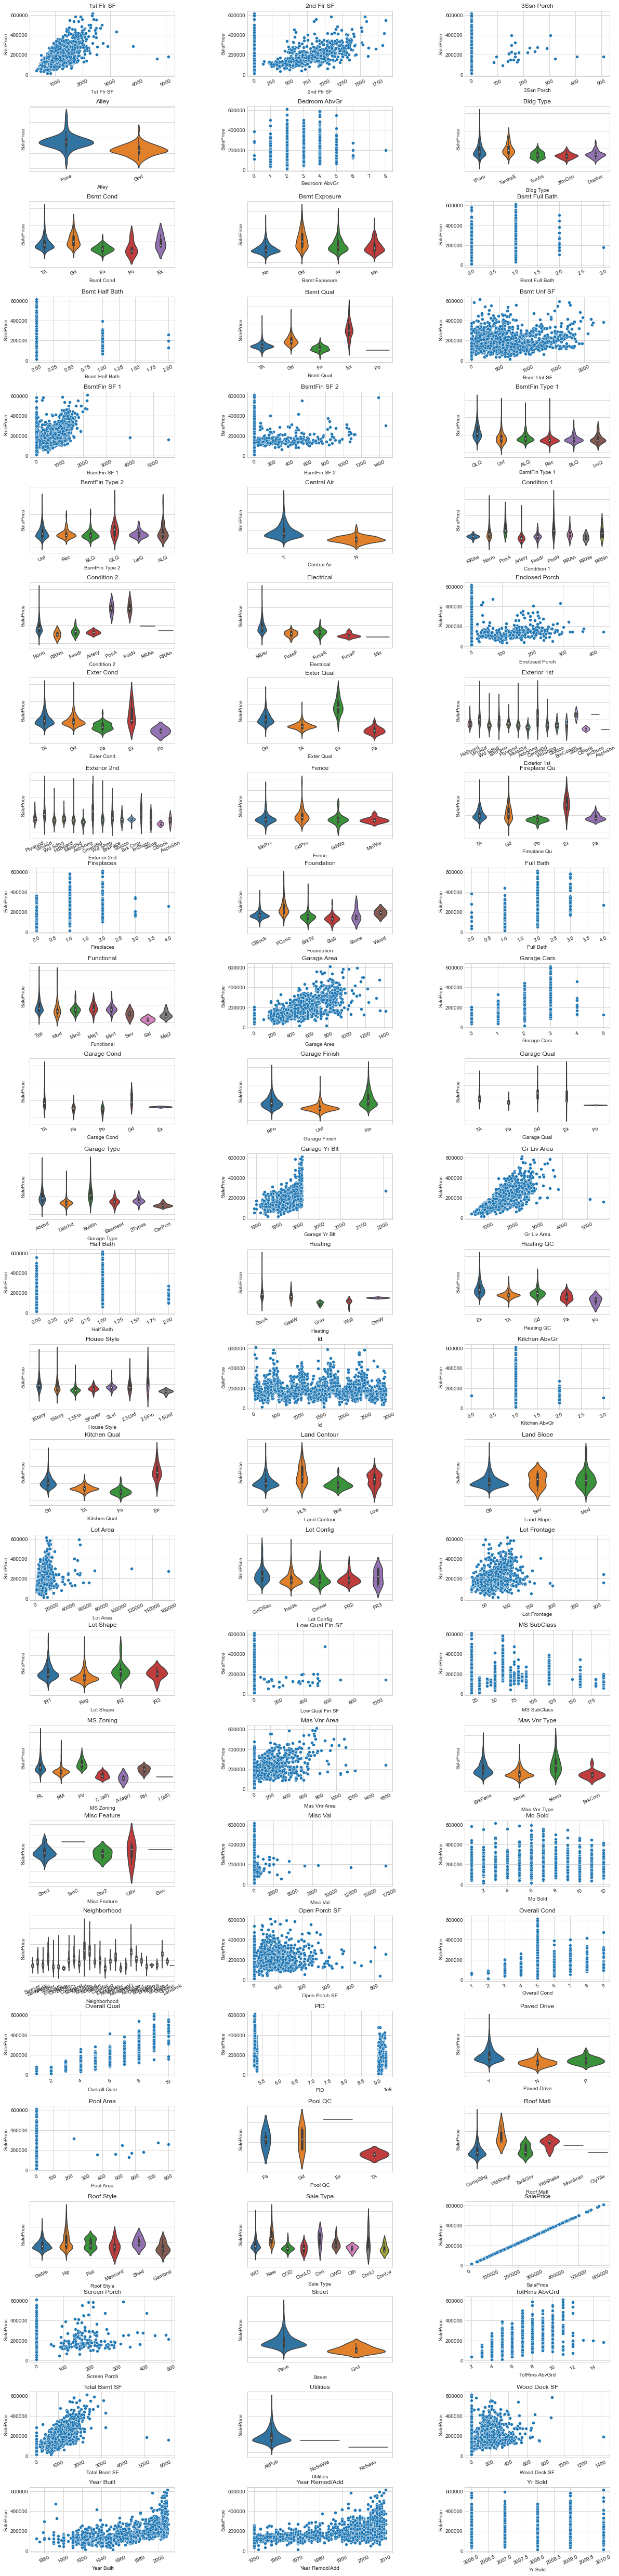

In [14]:
plot_distribution_comp(train_df, cols=3, width=20, height=90, hspace=0.45, wspace=0.5)

In the above graphs, we compare all our features to target variable (Sales price). We can see from here the impact of the non

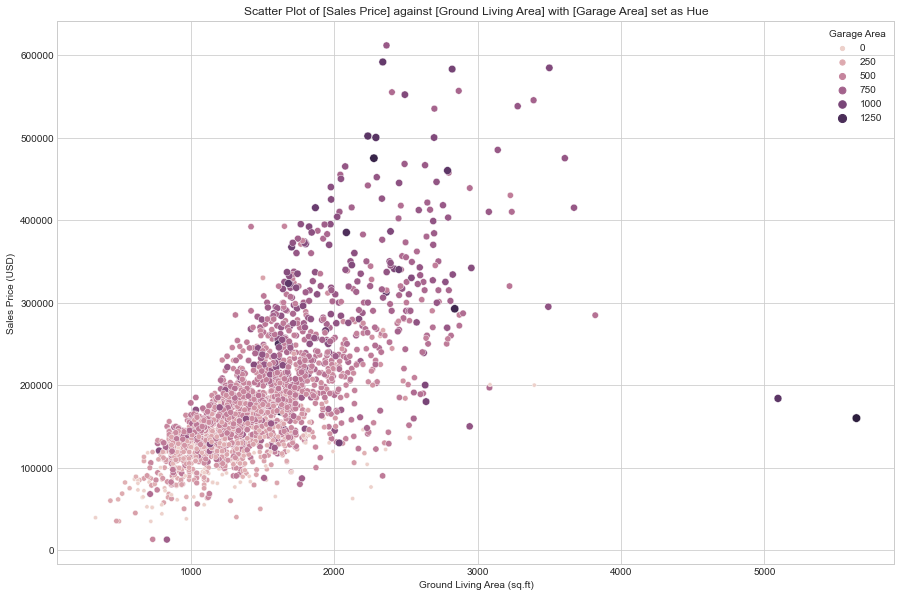

In [15]:
# Code
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data = train_df, x = 'Gr Liv Area', y='SalePrice', hue ='Garage Area', size = 'Garage Area')
ax.set(xlabel='Ground Living Area (sq.ft)', ylabel='Sales Price (USD)', title='Scatter Plot of [Sales Price] against [Ground Living Area] with [Garage Area] set as Hue');

### 2.0.2 Create Correlation Map of Raw Features that Impact Sales Price The Most

NOTE: We are not looking for positive or negative correlation here, hence we apply an absolute value to the correlation heatmap.

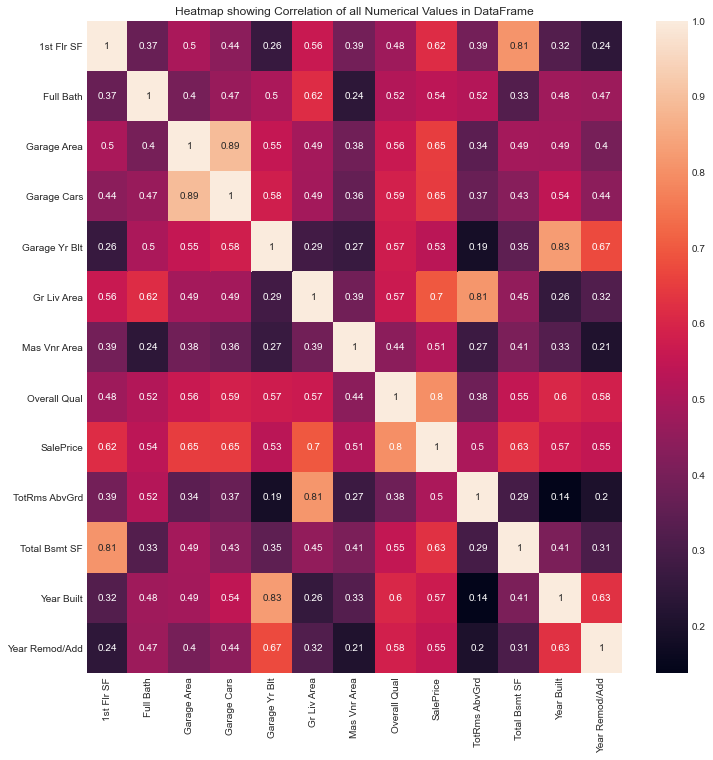

In [18]:
corr = train_df.corr()
top_feature = corr.index[abs(corr['SalePrice']>0.5)] # Apply the absolute
plt.subplots(figsize=(12, 12))
top_corr = train_df[top_feature].corr()
ax = sns.heatmap(top_corr, annot=True)
ax.set(title='Heatmap showing Correlation of all Numerical Values in DataFrame');

## 3.0 Feature Engineering

NOTE: We will simultaneously operate on our Test Data as move along, to ensure they both match prior to final fitting.

---

#### Ensure Column names are lower-cased and have no spaces

In [19]:
# Best practise to keep column names lower case and without spaces, the following commands clean this up
train_df.columns = train_df.columns.str.replace(' ', '_') 
train_df.columns= train_df.columns.str.lower()

# Reference: https://www.geeksforgeeks.org/remove-spaces-from-column-names-in-pandas/

In [20]:
# Best practise to keep column names lower case and without spaces, the following commands clean this up
test_df.columns = test_df.columns.str.replace(' ', '_') 
test_df.columns= test_df.columns.str.lower()

# Reference: https://www.geeksforgeeks.org/remove-spaces-from-column-names-in-pandas/

## 3.0.1 Features Missing more than 80% of values

For these feature we consider to not utilize, except we see reason with further analysis below. For example, although 99% of Houses are missing pool data, the fact that a House does not have a pool, can play strong influence on Sales price. So we just take note here.

In [21]:
# Check percentage of null values in each column
((train_df.isnull().sum().sort_values(ascending = False).head(6))/2051)*100

pool_qc         99.561190
misc_feature    96.830814
alley           93.174061
fence           80.497318
fireplace_qu    48.756704
lot_frontage    16.089712
dtype: float64

## 3.0.2 Single Variable with more than 78% Dominance

For this we run a customized for loop, to extract features with one very dominant trait. For instance if all houses in our Data set have houses painted red, using that data in our model will have no impact. So for these, we consider to not utilize, except we see reason with further analysis below.

In [22]:
for column in reversed(train_df.columns):
    
    columnSeriesObj = train_df[column].unique()
    
    columnValueCount = train_df[column].value_counts(normalize=True).tolist()[0]
    
    if len(train_df[column].unique()) <30 and train_df[column].value_counts(normalize=True).tolist()[0] > 0.75:
        
        print(f'{column}: {round(columnValueCount*100)}%')

utilities: 100%
street: 100%
sale_type: 87%
roof_style: 79%
roof_matl: 99%
pool_area: 100%
paved_drive: 91%
misc_val: 97%
misc_feature: 86%
ms_zoning: 78%
land_slope: 95%
land_contour: 90%
kitchen_abvgr: 96%
heating: 98%
garage_qual: 95%
garage_cond: 96%
functional: 93%
exter_cond: 87%
electrical: 91%
condition_2: 99%
condition_1: 86%
central_air: 93%
bsmtfin_type_2: 88%
bsmt_half_bath: 94%
bsmt_cond: 92%
bldg_type: 83%
3ssn_porch: 99%


## 3.0.3 Something else has stronger correlation
These features, were reviewed and observed to have a corresponding feature with a much stronger correlation. So we will not, as there is something with a much stonger correlation

1. Fireplaces (superseded by Fireplace Quality)
2. Garage Yr Blt (superseded by Year Built)
3. Bedroom AbvGr (superseded by Total Rooms Above Ground)
4. Bsmt Unf SF (Total Basement sq.feet stronger)
5. Basement 1 and 2 Square Footage (their summation gives Total Basement Square Footage)
6. First Floor and Second Floor Square Feet (their summation gives Ground Living Area)

## 3.0.4 Flat just random

We will not utilize these 2 features, as there is no discernable relationship or impact to our Sales price. For instance ID is just a list of random list of ID's. Note, we did not remove the PID here, as we saw some interesting thing with the first 3 numbers of PID, so we utilize it later.

1. ID
2. Yr Sold

## 3.0.5 [Continuous] Features that Correlate Well On Their Own

These are the features that have good coorelation with the target, we will utilize, but only after converting 'null' values to '0' or their 'means'

1. Lot Frontage
2. Lot Area
3. Mas Vnr Area
4. Garage Area
5. Garage Cars
6. TotRms AbvGrd
7. Gr Liv Area
8. Total Bsmt SF

In [23]:
# Check for null value counts in only the continuous variables above
train_df[['lot_area', 'lot_frontage','mas_vnr_area','garage_area','garage_cars','totrms_abvgrd','gr_liv_area', 'total_bsmt_sf']].isnull().sum()

lot_area           0
lot_frontage     330
mas_vnr_area      22
garage_area        1
garage_cars        1
totrms_abvgrd      0
gr_liv_area        0
total_bsmt_sf      1
dtype: int64

In [24]:
# Replace these null values with '0' or mean
train_df.update(train_df[['garage_area','garage_cars','total_bsmt_sf']].fillna(0)) # Fill null with Zero

In [25]:
train_df.update(train_df[['lot_frontage']].fillna(69)) # Fill null with Mean

In [26]:
train_df.update(train_df[['mas_vnr_area']].fillna(99.69)) # Fill null with Mean

In [27]:
# Replace these values with '0' or mean
test_df.update(test_df[['lot_frontage']].fillna(69.54))
test_df.update(test_df[['mas_vnr_area']].fillna(0))

In [28]:
# Check null values again to ensure operations above were sucessful
train_df[['lot_area', 'lot_frontage','mas_vnr_area','garage_area','garage_cars','totrms_abvgrd','gr_liv_area', 'total_bsmt_sf']].isnull().sum()

lot_area         0
lot_frontage     0
mas_vnr_area     0
garage_area      0
garage_cars      0
totrms_abvgrd    0
gr_liv_area      0
total_bsmt_sf    0
dtype: int64

In [29]:
# We create new Continuous dataframe to take in the continuous features we are interested in
continuous_df = pd.DataFrame(columns =['lot_area', 'lot_frontage','mas_vnr_area','garage_area','garage_cars','totrms_abvgrd','gr_liv_area', 'total_bsmt_sf'], data = train_df)

In [30]:
# We do the same for the test data
test_continuous_df = pd.DataFrame(columns =['lot_area', 'lot_frontage','mas_vnr_area','garage_area','garage_cars','totrms_abvgrd','gr_liv_area', 'total_bsmt_sf'], data = test_df)

In [31]:
continuous_df.head() # Verify Dataframe created properly

lot_area  lot_frontage  mas_vnr_area  garage_area  garage_cars  \
0     13517          69.0         289.0        475.0          2.0   
1     11492          43.0         132.0        559.0          2.0   
2      7922          68.0           0.0        246.0          1.0   
3      9802          73.0           0.0        400.0          2.0   
4     14235          82.0           0.0        484.0          2.0   

   totrms_abvgrd  gr_liv_area  total_bsmt_sf  
0              6         1479          725.0  
1              8         2122          913.0  
2              5         1057         1057.0  
3              7         1444          384.0  
4              6         1445          676.0

## 3.0.6 [Continuous] Features that Combine with Other Features or Data

We will analyze continuous variables that need to be  combined with other variables or data (where applicable). For example, we will convert date house was built to age of the house.

1. ['Wood Deck SF'] + ['Open Porch SF'] + ['Screen Porch'] + ['Enclosed Porch']
2. ['Bsmt Half Bath'] + ['Bsmt Full Bath']  (Mentioned in 3.0.2 for possible deletion, but here we use it)
3. ['Half Bath'] + ['Full Bath']
4. 2010 - [Year Built] Convert to actual years from 2021
5. 2010 - [Year Remold] Convert to actual years from 2021
6. Overall Qual + Overall Cond

#### 3.0.6.1 Add Outdoor Construction Square Footage

In [32]:
continuous_df['ext_area'] = train_df['wood_deck_sf'] + train_df['open_porch_sf'] + train_df['screen_porch'] + train_df['enclosed_porch']

In [33]:
test_continuous_df['ext_area'] = test_df['wood_deck_sf'] + test_df['open_porch_sf'] + test_df['screen_porch'] + test_df['enclosed_porch']

#### 3.0.6.2 Add Number of basement baths

In [34]:
continuous_df['bsmt_total_bath'] = train_df['bsmt_half_bath'] + train_df['bsmt_full_bath']

In [35]:
test_continuous_df['bsmt_total_bath'] = test_df['bsmt_half_bath'] + test_df['bsmt_full_bath']

In [36]:
train_df['bsmt_full_bath'].sort_values(ascending = False) # Check for null values

1584    3.0
791     3.0
289     2.0
1166    2.0
1410    2.0
       ... 
870     0.0
869     0.0
2050    0.0
616     NaN
1327    NaN
Name: bsmt_full_bath, Length: 2051, dtype: float64

NOTE: These null values on the Bathrooms will be addressed later.

#### 3.0.6.3 Add Number of House baths

In [37]:
continuous_df['total_bath'] = train_df['half_bath'] + train_df['full_bath']

In [38]:
test_continuous_df['total_bath'] = test_df['half_bath'] + test_df['full_bath']

#### 3.0.6.4 Age of House

In [39]:
continuous_df['year_built'] = 2010 - train_df['year_built']

In [40]:
test_continuous_df['year_built'] = 2010 - test_df['year_built']

#### 3.0.6.5 Age of House after Plastic Surgery

In [41]:
continuous_df['year_remod'] = 2010 - train_df['year_remod/add']

In [42]:
test_continuous_df['year_remod'] = 2010 - test_df['year_remod/add']

#### 3.6.6 Combined Overall Quality and Condition

In [43]:
continuous_df['overall_rating'] = train_df['overall_qual']# + train_df['overall_cond']

In [44]:
test_continuous_df['overall_rating'] = test_df['overall_qual']# + test_df['overall_cond']

## 3.0.7 [Categorical] Features That are Incorrect Types
We will convert these Data Types from Int to Strings so that we can treat as classifications to dummify. We will also carry out the extraction of the first 3 characters on the PID feature.We have a hunch that these could be important.

1. PID: ['533', '531', '535', '916', '906', '908', '527', '907', '923',
       '902', '905', '528', '532', '909', '911', '534', '914', '903',
       '910', '526', '924', '913', '904', '921', '912']
2. Mo Sold: [ 3  4  1  6  5  9  7  2 12 10 11  8]
3. MS SubClass (convert from int to float)

### 3.0.7.1 PID

In [45]:
train_df['pid'].dtype

dtype('int64')

In [46]:
train_df['pid'] = train_df['pid'].astype(str)

In [47]:
test_df['pid'] = test_df['pid'].astype(str)

In [48]:
# Get the first 3 digits in PID
train_df['pid'] = train_df['pid'].apply(lambda x: x[:3])

In [49]:
# Get the first 3 digits in PID
test_df['pid'] = test_df['pid'].apply(lambda x: x[:3])

In [50]:
train_df['pid'].unique()

array(['533', '531', '535', '916', '906', '908', '527', '907', '923',
       '902', '905', '528', '532', '909', '911', '534', '914', '903',
       '910', '526', '924', '913', '904', '921', '912'], dtype=object)

In [51]:
train_df['pid'].dtype

dtype('O')

In [52]:
continuous_df['pid'] = train_df['pid']

In [53]:
test_continuous_df['pid'] = test_df['pid']

In [54]:
continuous_df.head()

lot_area  lot_frontage  mas_vnr_area  garage_area  garage_cars  \
0     13517          69.0         289.0        475.0          2.0   
1     11492          43.0         132.0        559.0          2.0   
2      7922          68.0           0.0        246.0          1.0   
3      9802          73.0           0.0        400.0          2.0   
4     14235          82.0           0.0        484.0          2.0   

   totrms_abvgrd  gr_liv_area  total_bsmt_sf  ext_area  bsmt_total_bath  \
0              6         1479          725.0        44              0.0   
1              8         2122          913.0        74              1.0   
2              5         1057         1057.0        52              1.0   
3              7         1444          384.0       100              0.0   
4              6         1445          676.0        59              0.0   

   total_bath  year_built  year_remod  overall_rating  pid  
0           3          34           5               6  533  
1           3          14          13               7  531  
2           1          57           3               5  535  
3           3           4           3               5  916  
4           2         110          17               6  906

In [55]:
test_continuous_df.head()

lot_area  lot_frontage  mas_vnr_area  garage_area  garage_cars  \
0      9142         69.00           0.0          440            1   
1      9662         69.54           0.0          580            2   
2     17104         58.00           0.0          426            2   
3      8520         60.00           0.0          480            2   
4      9500         69.54         247.0          514            2   

   totrms_abvgrd  gr_liv_area  total_bsmt_sf  ext_area  bsmt_total_bath  \
0              9         1928           1020       172                0   
1             10         1967           1967       170                0   
2              7         1496            654       124                1   
3              5          968            968       184                0   
4              6         1394           1394       261                1   

   total_bath  year_built  year_remod  overall_rating  pid  
0           2         100          60               6  902  
1           2          33          33               5  905  
2           3           4           4               7  528  
3           1          87           4               5  902  
4           2          47          47               6  535

### 3.0.7.2 Months Sold

In [56]:
train_df['mo_sold'].dtype

dtype('int64')

In [57]:
train_df['mo_sold'] = train_df['mo_sold'].astype(str)

In [58]:
test_df['mo_sold'] = test_df['mo_sold'].astype(str)

In [59]:
train_df['mo_sold'].dtype

dtype('O')

In [60]:
continuous_df['mo_sold'] = train_df['mo_sold']

In [61]:
test_continuous_df['mo_sold'] = test_df['mo_sold']

### 3.0.7.3 MS SubClass

In [62]:
train_df['ms_subclass'].dtype

dtype('int64')

In [63]:
train_df['ms_subclass'] = train_df['ms_subclass'].astype(str)

In [64]:
test_df['ms_subclass'] = test_df['ms_subclass'].astype(str)

In [65]:
train_df['ms_subclass'].dtype

dtype('O')

In [66]:
continuous_df['ms_subclass'] = train_df['ms_subclass']

In [67]:
test_continuous_df['ms_subclass'] = test_df['ms_subclass']

## 3.0.8 [Categorical] Features with Good Correlation
These are the Categorical features that have good correlation with the target, we will utilize as is.

1. House Style 
2. Foundation
3. Neighborhood
4. Exterior 1st
5. Exterior 2nd
6. Mas Vnr Type
7. Garage Type
8. Roof Style
9. Roof Material

In [68]:
categorical_df = pd.DataFrame( data = train_df, columns =['house_style', 'foundation', 'neighborhood','exterior_1st', 'exterior_2nd', 'mas_vnr_type','garage_type','roof_style','roof_matl'])

In [69]:
test_categorical_df = pd.DataFrame( data = test_df, columns =['house_style', 'foundation', 'neighborhood','exterior_1st', 'exterior_2nd', 'mas_vnr_type','garage_type','roof_style','roof_matl'])

In [70]:
categorical_df = pd.get_dummies(data=categorical_df, columns=['house_style', 'foundation', 'neighborhood','exterior_1st', 'exterior_2nd', 'mas_vnr_type','garage_type','roof_style','roof_matl'], drop_first=True)

In [71]:
test_categorical_df = pd.get_dummies(data=test_categorical_df, columns=['house_style', 'foundation', 'neighborhood','exterior_1st', 'exterior_2nd', 'mas_vnr_type','garage_type','roof_style','roof_matl'], drop_first=True)

## 3.0.9 [Categorical] Make Binary just 2 values
These are features I believe, would be best treated as BINARY, meaning we would have to reduce their unique values to 2.

1. Does not have [Kitchen AbvGr]
2. Does house have a pool or not use [Pool Area: 100%] or [Pool QC]
3. Lotconfig [culdesac or corner should be in one column]
4. Houses that do not have S-Breaker in the Electrical Features
5. Does house haev Central Air? yes or no (used in 2.0)
6. Does not have any Low Quality Square Footage, where [Low Qual Fin SF] != 0

#### 3.0.9.1 Houses with Kitchen

In [72]:
print (f"Houses without Kitchens that sold for more than $150,000: {round(100*(train_df[(train_df['kitchen_abvgr'] == 0) & (train_df['saleprice'] > 150000)].shape[0]/train_df[train_df['kitchen_abvgr'] == 0].shape[0]))}%")
print (f"Houses with Kitchens that sold for more than $150,000: {round(100*(train_df[(train_df['kitchen_abvgr'] != 0) & (train_df['saleprice'] > 150000)].shape[0]/train_df[train_df['kitchen_abvgr'] != 0].shape[0]))}%")

Houses without Kitchens that sold for more than $150,000: 0%
Houses with Kitchens that sold for more than $150,000: 57%


In [73]:
categorical_df['kitchen_bin'] = np.where(train_df['kitchen_abvgr'] != 0, 1, 0)

In [74]:
test_categorical_df['kitchen_bin'] = np.where(test_df['kitchen_abvgr'] != 0, 1, 0)

In [75]:
categorical_df.head()

house_style_1.5Unf  house_style_1Story  house_style_2.5Fin  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   1                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   house_style_2.5Unf  house_style_2Story  house_style_SFoyer  \
0                   0                   1                   0   
1                   0                   1                   0   
2                   0                   0                   0   
3                   0                   1                   0   
4                   0                   0                   0   

   house_style_SLvl  foundation_CBlock  foundation_PConc  foundation_Slab  \
0                 0                  1                 0                0   
1                 0                  0                 1                0   
2                 0                  1                 0                0   
3                 0                  0                 1                0   
4                 0                  0                 1                0   

   ...  roof_style_Gambrel  roof_style_Hip  roof_style_Mansard  \
0  ...                   0               0                   0   
1  ...                   0               0                   0   
2  ...                   0               0                   0   
3  ...                   0               0                   0   
4  ...                   0               0                   0   

   roof_style_Shed  roof_matl_CompShg  roof_matl_Membran  roof_matl_Tar&Grv  \
0                0                  1                  0                  0   
1                0                  1                  0                  0   
2                0                  1                  0                  0   
3                0                  1                  0                  0   
4                0                  1                  0                  0   

   roof_matl_WdShake  roof_matl_WdShngl  kitchen_bin  
0                  0                  0            1  
1                  0                  0            1  
2                  0                  0            1  
3                  0                  0            1  
4                  0                  0            1  

[5 rows x 86 columns]

#### 3.0.9.2 Houses with Pool

In [76]:
print (f"Houses with pools that sold for less than $150,000: {round(100*(train_df[(train_df['pool_area'] == 0) & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['pool_area'] == 0].shape[0]))}%")
print (f"Houses without pools that sold for less than $150,000: {round(100*(train_df[(train_df['pool_area'] != 0) & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['pool_area'] != 0].shape[0]))}%")

Houses with pools that sold for less than $150,000: 43%
Houses without pools that sold for less than $150,000: 11%


In [77]:
categorical_df['pool_bin'] = np.where(train_df['pool_area'] != 0, 1, 0)

In [78]:
test_categorical_df['pool_bin'] = np.where(test_df['pool_area'] != 0, 1, 0)

#### 3.0.9.3 Houses with Cul De Sac or Corner Lot

In [79]:
print (f"Houses on Corner lot that sold for less than $150,000: {round(100*(train_df[(train_df['lot_config'] == 'CulDSac') | (train_df['lot_config'] == 'Corner') & (train_df['saleprice'] < 150000)].shape[0]/train_df[(train_df['lot_config'] == 'CulDSac') | (train_df['lot_config'] == 'Corner')].shape[0]))}%")
print (f"Houses not on Corner lot that sold for less than $150,000: {round(100*(train_df[(train_df['lot_config'] != 'CulDSac') | (train_df['lot_config'] != 'Corner') & (train_df['saleprice'] < 150000)].shape[0]/train_df[(train_df['lot_config'] != 'CulDSac') | (train_df['lot_config'] != 'Corner')].shape[0]))}%")

Houses on Corner lot that sold for less than $150,000: 57%
Houses not on Corner lot that sold for less than $150,000: 95%


In [80]:
categorical_df['corner'] = np.where(((train_df['lot_config'] == 'CulDSac') | (train_df['lot_config'] == 'Corner')),1,0)

In [81]:
test_categorical_df['corner'] = np.where(((test_df['lot_config'] == 'CulDSac') | (test_df['lot_config'] == 'Corner')),1,0)

#### 3.0.9.4 Houses with Electrical that Have Standard Circuit Breakers

In [82]:
print (f"Houses with Circuit Breakers that sold for less than $150,000: {round(100*(train_df[(train_df['electrical'] == 'SBrkr') & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['electrical'] == 'SBrkr'].shape[0]))}%")
print (f"Houses without Circuit Breakers that sold for less than $150,000: {round(100*(train_df[(train_df['electrical'] != 'SBrkr') & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['electrical'] != 'SBrkr'].shape[0]))}%")

Houses with Circuit Breakers that sold for less than $150,000: 39%
Houses without Circuit Breakers that sold for less than $150,000: 83%


In [83]:
categorical_df['elec_sbrkrs_bin'] = np.where(train_df['electrical'] == 'SBrkr', 1, 0)

In [84]:
test_categorical_df['elec_sbrkrs_bin'] = np.where(test_df['electrical'] == 'SBrkr', 1, 0)

#### 3.0.9.5 Houses with Central Air

In [85]:
print (f"Houses with Central Air that sold for less than $100,000: {round(100*(train_df[(train_df['central_air'] == 'Y') & (train_df['saleprice'] < 100000)].shape[0]/train_df[train_df['central_air'] == 'Y'].shape[0]))}%")
print (f"Houses without Central Air that sold for less than $100,000: {round(100*(train_df[(train_df['central_air'] == 'N') & (train_df['saleprice'] < 100000)].shape[0]/train_df[train_df['central_air'] == 'N'].shape[0]))}%")

Houses with Central Air that sold for less than $100,000: 5%
Houses without Central Air that sold for less than $100,000: 52%


In [86]:
categorical_df['central_air'] = np.where(train_df['central_air'] == 'Y', 1, 0)

In [87]:
test_categorical_df['central_air'] = np.where(test_df['central_air'] == 'Y', 1, 0)

#### 3.0.9.6 Houses with High Qual Fin SF

In [88]:
print (f"Houses with no Low Quality Square Footage that sold for less than $150,000: {round(100*(train_df[(train_df['low_qual_fin_sf'] == 0) & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['low_qual_fin_sf'] == 0].shape[0]))}%")
print (f"Houses with Low Quality Square Footage that sold for less than $150,000: {round(100*(train_df[(train_df['low_qual_fin_sf'] != 0) & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['low_qual_fin_sf'] != 0].shape[0]))}%")

Houses with no Low Quality Square Footage that sold for less than $150,000: 42%
Houses with Low Quality Square Footage that sold for less than $150,000: 73%


In [89]:
x = round(100*(train_df[(train_df['low_qual_fin_sf'] == 0) & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['low_qual_fin_sf'] == 0].shape[0]))
y = round(100*(train_df[(train_df['low_qual_fin_sf'] != 0) & (train_df['saleprice'] < 150000)].shape[0]/train_df[train_df['low_qual_fin_sf'] != 0].shape[0]))

In [90]:
categorical_df['high_quality_bin'] = np.where(train_df['low_qual_fin_sf'] != 0, 1, 0)

In [91]:
test_categorical_df['high_quality_bin'] = np.where(test_df['low_qual_fin_sf'] != 0, 1, 0)

### 4.0 [Ordinal Categorical] Features
We would have to convert from String Object to Int because they are ordinal, we would do so with a Dictionary.

1. Garage Cond: ['TA' 'Fa' nan 'Po' 'Gd' 'Ex'] (used in 2.0)
2. Garage Qual: ['TA' 'Fa' nan 'Gd' 'Ex' 'Po'] (used in 2.0)
3. Fireplace Qu: [nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
4. Functional: ['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']    (used in 2.0)
5. Kitchen Qual: ['Gd' 'TA' 'Fa' 'Ex']
6. Heating QC: ['Ex' 'TA' 'Gd' 'Fa' 'Po']
7. Bsmt Exposure: ['No' 'Gd' 'Av' nan 'Mn']
8. Bsmt Cond: ['TA' 'Gd' nan 'Fa' 'Po' 'Ex'] (used in 2.0)
9. Bsmt Qual: ['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
10. BsmtFin Type 1 (object): ['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
11. Exter Cond: ['TA' 'Gd' 'Fa' 'Ex' 'Po'] (used in 2.0)
12. Exter Qual: ['Gd' 'TA' 'Ex' 'Fa']
13. MS Zoning: ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']       (used in 2.0)
14. Lot Shape: [Reg,IR1,IR2,IR3]
15. Garage Finish: ['RFn' 'Unf' 'Fin' nan]

#### 4.0.1 Convert all 'NA' to 0

In [92]:
train_df.update(train_df[['garage_cond','garage_qual','fireplace_qu','functional', 'kitchen_qual', 'heating_qc',  'bsmt_exposure','bsmt_cond', 'bsmt_qual','bsmtfin_type_1','exter_cond', 'exter_qual','ms_zoning', 'lot_shape','garage_finish']].fillna(0))

In [93]:
test_df.update(test_df[['garage_cond','garage_qual','fireplace_qu','functional', 'kitchen_qual', 'heating_qc',  'bsmt_exposure','bsmt_cond', 'bsmt_qual','bsmtfin_type_1','exter_cond', 'exter_qual','ms_zoning', 'lot_shape','garage_finish']].fillna(0))

#### 4.0.2 Convert Categories to Ordinal Integer Values

In [94]:
# Ordinal Dictionary
mapping = {   0 : 0,
           "Po" : 1,
           "Fa" : 2,
           "TA" : 3,
           "Gd" : 4,
           "Ex" : 5,
           "GLQ": 6,
           "ALQ": 5,
           "BLQ": 4,
           "Rec": 3,
           "LwQ": 2,
           "Unf": 1,
           "Av" : 3,
           "Mn" : 2,
           "No" : 1,
           'RH' : 5,
            'RM':4,
            'RL':3,
            'RP':2,
           'FV' : 1,
           'C (all)' : 1,
           'A (agr)': 1,
           'I (all)': 1,
           'Typ'    :7,
          'Min1':6,   
           'Min2':5,    
           'Mod':4,    
           'Maj1':3,
           'Maj2':2,    
           'Sev':1,    
           'Sal':0,
           "Reg":4,
           "IR1":3,
           "IR2":2,
           "IR3":1,
           'Fin' :3,
           'RFn' :2,
           'Unf':1  
          }

# reference https://stackoverflow.com/questions/54440507/encoding-ordinal-values-in-python

In [95]:
# Sample dataframe with 2 ordinal categorical columns: 'temp' and 'place'
ordinal_categorical_df = pd.DataFrame(columns =['garage_cond','garage_qual','fireplace_qu','functional', 'kitchen_qual', 'heating_qc',  'bsmt_exposure','bsmt_cond', 'bsmt_qual','bsmtfin_type_1','exter_cond', 'exter_qual','ms_zoning', 'lot_shape','garage_finish'], data = train_df)

In [96]:
# Sample dataframe with 2 ordinal categorical columns: 'temp' and 'place'
test_ordinal_categorical_df = pd.DataFrame(columns =['garage_cond','garage_qual','fireplace_qu','functional', 'kitchen_qual', 'heating_qc',  'bsmt_exposure','bsmt_cond', 'bsmt_qual','bsmtfin_type_1','exter_cond', 'exter_qual','ms_zoning', 'lot_shape','garage_finish'], data = test_df)

In [97]:
ordinal_categorical_df.head()

garage_cond garage_qual fireplace_qu functional kitchen_qual heating_qc  \
0          TA          TA            0        Typ           Gd         Ex   
1          TA          TA           TA        Typ           Gd         Ex   
2          TA          TA            0        Typ           Gd         TA   
3          TA          TA            0        Typ           TA         Gd   
4          TA          TA            0        Typ           TA         TA   

  bsmt_exposure bsmt_cond bsmt_qual bsmtfin_type_1 exter_cond exter_qual  \
0            No        TA        TA            GLQ         TA         Gd   
1            No        TA        Gd            GLQ         TA         Gd   
2            No        TA        TA            GLQ         Gd         TA   
3            No        TA        Gd            Unf         TA         TA   
4            No        Gd        Fa            Unf         TA         TA   

  ms_zoning lot_shape garage_finish  
0        RL       IR1           RFn  
1        RL       IR1           RFn  
2        RL       Reg           Unf  
3        RL       Reg           Fin  
4        RL       IR1           Unf

In [98]:
ordinal_categorical_df = ordinal_categorical_df.applymap(lambda x: mapping[x])

In [99]:
test_ordinal_categorical_df = test_ordinal_categorical_df.applymap(lambda x: mapping[x])

In [100]:
ordinal_categorical_df.isnull().sum()

garage_cond       0
garage_qual       0
fireplace_qu      0
functional        0
kitchen_qual      0
heating_qc        0
bsmt_exposure     0
bsmt_cond         0
bsmt_qual         0
bsmtfin_type_1    0
exter_cond        0
exter_qual        0
ms_zoning         0
lot_shape         0
garage_finish     0
dtype: int64

## 4.0 Feature Selection
**Summary** We have 3 unique Dataframes we want to now study and analyze further, namely:
1. 16 Continuous Dataframe
2. 16 Categorical Dataframes (includes binned features created in 3.0.9
3. 15 Ordinal Dataframes

In [101]:
ordinal_categorical_df['saleprice'] = train_df['saleprice'] 

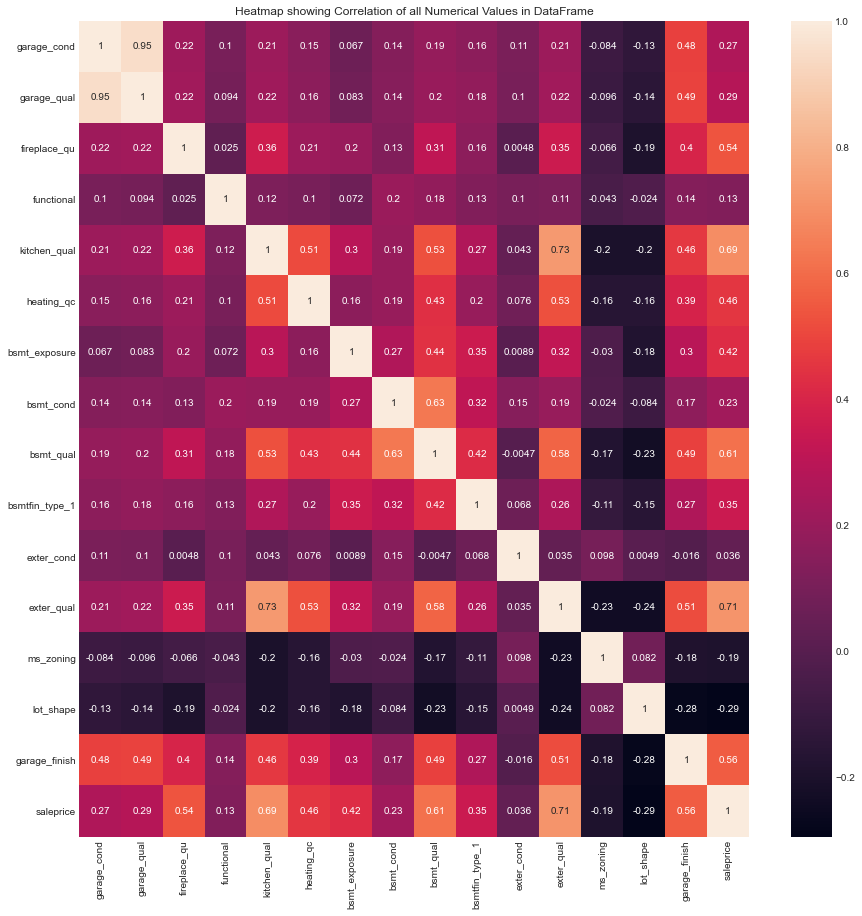

In [102]:
corrmat = ordinal_categorical_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,15))
ax=sns.heatmap(ordinal_categorical_df[top_corr_features].corr(),annot=True,cmap='rocket')
ax.set(title='Heatmap showing Correlation of all Numerical Values in DataFrame');

In [103]:
bins_df = pd.DataFrame(columns =['kitchen_bin', 'pool_bin','corner','elec_sbrkrs_bin', 'central_air','high_quality_bin'], data = categorical_df)

In [104]:
bins_df['saleprice'] = train_df['saleprice']

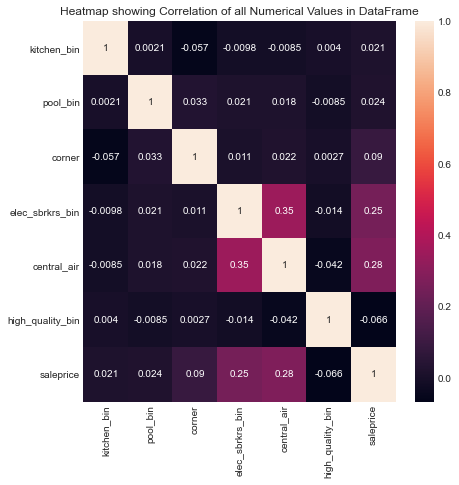

In [105]:
corrmat = bins_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (7,7))
ax=sns.heatmap(bins_df[top_corr_features].corr(),annot=True,cmap='rocket')
ax.set(title='Heatmap showing Correlation of all Numerical Values in DataFrame');

In [106]:
continuous_df['saleprice'] = train_df['saleprice'] 

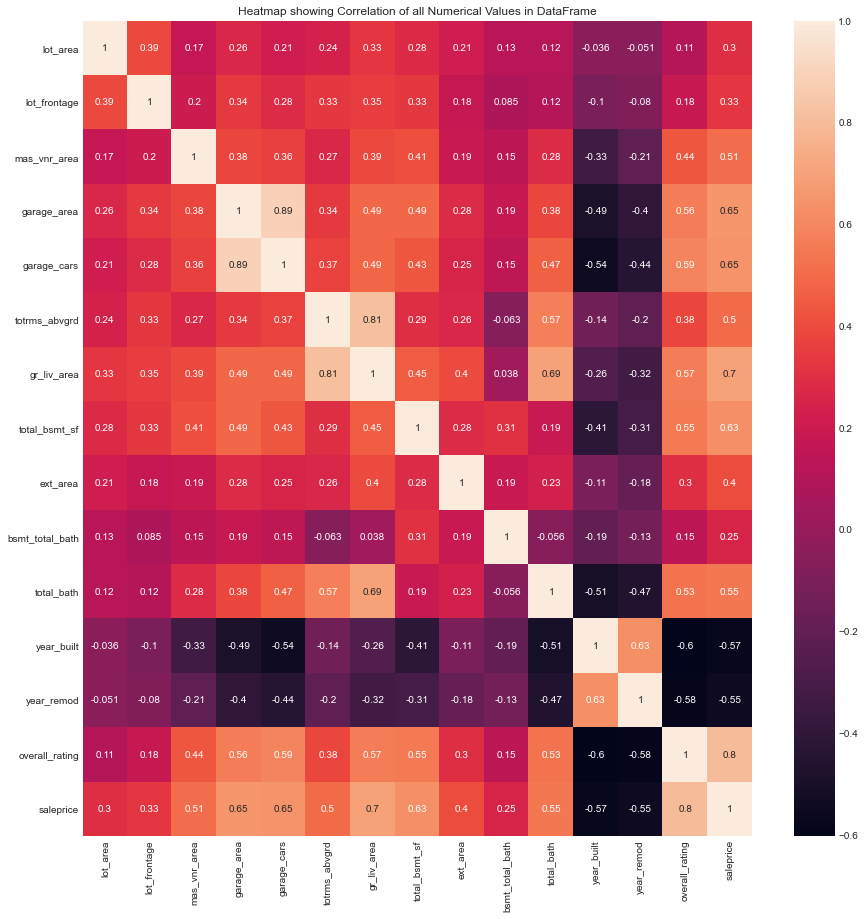

In [107]:
corrmat = continuous_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,15))
ax=sns.heatmap(continuous_df[top_corr_features].corr(),annot=True,cmap='rocket')
ax.set(title='Heatmap showing Correlation of all Numerical Values in DataFrame');

In [108]:
frames = [ordinal_categorical_df, categorical_df , continuous_df]
combined_df = pd.concat(frames, axis = 1)
# Combine our 3 refined datasets

In [109]:
test_frames = [test_ordinal_categorical_df, test_categorical_df , test_continuous_df]
test_combined_df = pd.concat(test_frames, axis = 1)
# Combine our 3 refined datasets

In [110]:
X_kaggle = test_combined_df
# Assign our test set the refined dataframe for Kaggle submission

In [111]:
X = combined_df.drop('saleprice', axis=1) # data: This removes 'Sales Price' feature from the list

In [112]:
y = combined_df['saleprice']

In [113]:
y.head()

saleprice  saleprice
0     130500     130500
1     220000     220000
2     109000     109000
3     174000     174000
4     138500     138500

In [114]:
y = y.iloc[:,:-1] # Becausse of the correlation maps we created above, we added an extra Sales pricse column
# This code above is to drop the duplicate

In [115]:
y.head()

saleprice
0     130500
1     220000
2     109000
3     174000
4     138500

In [116]:
X.isnull().sum().sort_values() # We check to ensure there are no null values

garage_cond             0
garage_type_CarPort     0
garage_type_BuiltIn     0
garage_type_Basment     0
garage_type_Attchd      0
                       ..
neighborhood_Edwards    0
neighborhood_Crawfor    0
neighborhood_NridgHt    0
ms_subclass             0
bsmt_total_bath         2
Length: 123, dtype: int64

In [117]:
X = X.fillna(0) # Replace all null values with Zero

In [118]:
X.isnull().sum().sort_values() # We check to ensure there are no null values

garage_cond             0
garage_type_Detchd      0
garage_type_CarPort     0
garage_type_BuiltIn     0
garage_type_Basment     0
                       ..
neighborhood_Gilbert    0
neighborhood_Edwards    0
neighborhood_Crawfor    0
neighborhood_ClearCr    0
ms_subclass             0
Length: 123, dtype: int64

In [119]:
# Export our cleaned Dataset to a .csv file
X.to_csv('/Users/macbook/Google Drive/0. Ofilispeaks Business (Mac and Cloud)/9. Data Science/0. Python/General Assembly Training/project_2-master/datasets/combined_df.csv', index=False)
X_kaggle.to_csv('/Users/macbook/Google Drive/0. Ofilispeaks Business (Mac and Cloud)/9. Data Science/0. Python/General Assembly Training/project_2-master/datasets/test_combined_df.csv', index=False)

### 4.0.1 Identifying Our Top Features

In [120]:
# We utilize Lasso, because it Zeroes out features that are not deemed important.
# We would retrofit this to help us pick our top performing features by tweaking Alpha
# NOTE: The bigger the alpha the less features that will be selected.

feature_sel_model = SelectFromModel(Lasso(alpha=100, random_state=0)) # Utilizing Lasso for Feature selection
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=100, random_state=0))

In [121]:
feature_sel_model.get_support() #Overview

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True, False,
        True,  True, False, False, False,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [122]:
# let's print the number of total and selected features
# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 123
selected features: 66


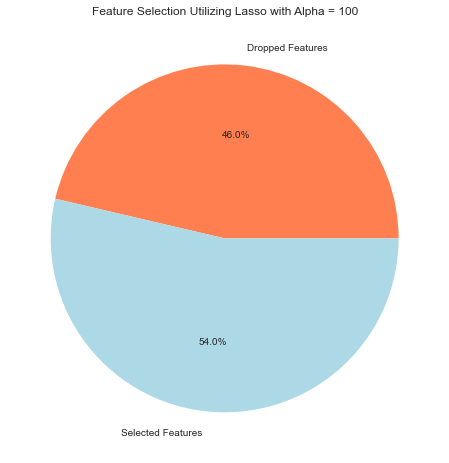

In [123]:
def absolute_value(val):
    
    return f'''{round(val)}%''' # Text to append Percent to

plt.figure(figsize=(8,8))
y_pie = np.array([57, 66])
colors = ["coral", "lightblue"]
mylabels = ["""Dropped Features""", """
Selected Features"""]
myexplode = [0, 0]
plt.title('''Feature Selection Utilizing Lasso with Alpha = 100''')
plt.pie(y_pie, labels = mylabels, explode = myexplode, autopct=absolute_value, colors = colors)
plt.show() 

In [124]:
selected_feat

Index(['garage_cond', 'garage_qual', 'fireplace_qu', 'functional',
       'kitchen_qual', 'heating_qc', 'bsmt_exposure', 'bsmt_cond', 'bsmt_qual',
       'bsmtfin_type_1', 'exter_cond', 'exter_qual', 'ms_zoning', 'lot_shape',
       'garage_finish', 'house_style_1Story', 'house_style_2Story',
       'neighborhood_BrkSide', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_GrnHill',
       'neighborhood_IDOTRR', 'neighborhood_NAmes', 'neighborhood_NWAmes',
       'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
       'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr',
       'exterior_1st_BrkFace', 'exterior_1st_CemntBd', 'exterior_1st_HdBoard',
       'exterior_1st_Stucco', 'exterior_1st_Wd Sdng', 'exterior_2nd_HdBoard',
       'exterior_2nd_MetalSd', 'exterior_2nd_Stucco', 'exterior_2nd_VinylSd',
       'exterior_2nd_Wd Sdng', 'mas_vnr_type_BrkFace', 'mas_vnr_type_None',
    

In [125]:
X = X[selected_feat] # We assign X to our selected features

# 5.0 Model Analysis

**Function to Score Our Models on both Scaled and Unscaled Datasets.**

Linear Algorithms

1. Linear Regression
2. ElasticNet
3. Ridge Regression (L2 Regularization)
4. Lasso Regularization (L1 Regularization)

Non-Linear Algorithms

1. K Nearest Neighbours
2. Decision Tree

In [126]:
# Function that runs the requested algorithm and returns the accuracy metrics
def multi_algo (algo, test_size, X, y, cv):
    
    # Split
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size = test_size)
    
    #Fit
    model = algo.fit(X_train, y_train)
    
    # 1. Train Scores
    
    split_accuracy_score_train = round(model.score(X_train, y_train) * 100, 2)
    
    # 2. Test Scores
    
    split_accuracy_score_test = round(model.score(X_test, y_test) * 100, 2)
    y_pred = model.predict(X_test)
    rms = round(mean_squared_error(y_test, y_pred, squared=False), 2)
    
    # 3. Cross Validation Scores

    cv_accuracy_score = list(cross_val_score(model, X, y, cv = cv, scoring='neg_root_mean_squared_error'))
    cv_accuracy_score_max = round(max(cv_accuracy_score), 2)
    cv_accuracy_score_min = round(min(cv_accuracy_score), 2)
    
    # Scale our data
    sc = StandardScaler()
    Z_train = sc.fit_transform(X_train)
    Z_test = sc.transform(X_test)
    
    # Fit our Scaled data
    model_scaled = algo.fit(Z_train, y_train)

    # 4. Scaled Train Scores
    
    scaled_acc_score_train = round(model_scaled.score(Z_train, y_train)* 100, 2)
    
    # 5. Scaled Test Scores
    
    scaled_acc_score_test = round(model_scaled.score(Z_test, y_test)* 100, 2)
     
    return cv, test_size*100, split_accuracy_score_train, split_accuracy_score_test, cv_accuracy_score_max, cv_accuracy_score_min, scaled_acc_score_train, scaled_acc_score_test, rms

## 5.1 Linear Regression

Since Linear Regression has little to no Parameters that will impact it's performance, we don't run a GridSearch on it.

In [127]:
# Linear Regression
start_time = time.time()
lr_cv, lr_ts, lr_s_a_s_tr, lr_s_a_s_tst, lr_cv_a_scr_mx, lr_cv_a_scr_mn, lr_s_a_scr_tr, lr_s_a_scr_tst, lr_rms = multi_algo(LinearRegression(),
                                                                    0.25,
                                                                    X, 
                                                                    y, 
                                                                    7)
lr_log_time = (time.time() - start_time)
print (f'Process took {round(lr_log_time,2)} seconds to run')
print(f'K-Folds of {lr_cv} used for Cross-Validation and Test-Split-Size was {lr_ts}%')
print(f'Root Mean Square Error is {lr_rms}')
print(' ')
print(f'R2 Score of Train data is [{lr_s_a_s_tr}%]')
print(f'R2 Score of Test data is [{lr_s_a_s_tst}%]')
print(f'Max CV-R2 Score is [{abs(lr_cv_a_scr_mx)}]')
print(f'Min CV-R2 Score is [{abs(lr_cv_a_scr_mn)}]')
print(f'Scaled R2 Score of Train data is [{lr_s_a_scr_tr}%]')
print(f'Scaled R2 Score of Test data is [{lr_s_a_scr_tst}%]')

Process took 0.21 seconds to run
K-Folds of 7 used for Cross-Validation and Test-Split-Size was 25.0%
Root Mean Square Error is 26968.07
 
R2 Score of Train data is [87.83%]
R2 Score of Test data is [88.16%]
Max CV-R2 Score is [23622.1]
Min CV-R2 Score is [36968.2]
Scaled R2 Score of Train data is [87.83%]
Scaled R2 Score of Test data is [88.16%]


#### NOTE

We see observe that scaling had little to no impact on our Linear Regression Model. This makes sense as it is an invariant model that does not change much with standardization. See below explanations:

"Is the regression method you are using invariant, in that the substantive answer does not change with standardization? Ordinary least squares is invariant, while methods such as lasso or ridge regression are not. So, for invariant methods there is no real need for standardization, while for non-invariant methods you should probably standardize. (Or at least think it through)."

Reference: https://stats.stackexchange.com/questions/201909/when-to-normalize-data-in-regression

## 5.2 Elastic Net
**NOTE: Elastic net is a hybrid of ridge regression and lasso regularization**

**- Search for best Parameters utilizing a Grid Search**

In [128]:
# Logistic Regression - Random Search for Hyperparameters
start_time = time.time()
model = ElasticNet()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['l1_ratio'] = [0.25, 0.5, 0.75] #The extremes '0' and '1' here just result in L1 or L2 Regularization
space['alpha'] = [1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False] 

# NOTE: If ['normalize'] = True, the regressors X will be normalized before regression by subtracting
# the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before 
# calling fit on an estimator with normalize=False.
# NOTE: The L2 Norm, a.k.a. Euclidean Norm, a.k.a. Pythagoras' Theorem, is the same as the Standard Deviation.
# Reference: https://winderresearch.com/why-do-we-use-standard-deviation/

# define search
search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

log_time = (time.time() - start_time)

# summarize result
print (f'ElasticNet Parameter Tuning Process took {round(log_time,2)} seconds to run')
print(f'Elastic Net Best Score: {round(result.best_score_,2)}')
print(f'Elastic Net Best Hyperparameters: {result.best_params_}')

# reference https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

ElasticNet Parameter Tuning Process took 63.47 seconds to run
Elastic Net Best Score: -31235.03
Elastic Net Best Hyperparameters: {'alpha': 1, 'fit_intercept': True, 'l1_ratio': 0.75, 'normalize': False}


**- Run Best Selected Parameter Through our Scoring Function**

In [129]:
# Linear Regression
start_time = time.time()

elasticnet = ElasticNet(alpha = 1,
              fit_intercept= True,
              normalize= False,
              l1_ratio = 0.75,
              selection = 'cyclic')

en_cv, en_ts, en_s_a_s_tr, en_s_a_s_tst, en_cv_a_scr_mx, en_cv_a_scr_mn, en_s_a_scr_tr, en_s_a_scr_tst, en_rms = multi_algo(elasticnet,
                                                                    0.25,
                                                                    X, 
                                                                    y, 
                                                                    10)
en_log_time = (time.time() - start_time)
print (f'Process took {round(en_log_time,2)} seconds to run')
print(f'K-Folds of {en_cv} used for Cross-Validation and Test-Split-Size was {en_ts}%')
print(f'Root Mean Square Error is {en_rms}')
print(' ')
print(f'R2 Score of Train data is [{en_s_a_s_tr}%]')
print(f'R2 Score of Test data is [{en_s_a_s_tst}%]')
print(f'Max CV-R2 Score is [{abs(en_cv_a_scr_mx)}]')
print(f'Min CV-R2 Score is [{abs(en_cv_a_scr_mn)}]')
print(f'Scaled R2 Score of Train data is [{en_s_a_scr_tr}%]')
print(f'Scaled R2 Score of Test data is [{en_s_a_scr_tst}%]')

Process took 0.52 seconds to run
K-Folds of 10 used for Cross-Validation and Test-Split-Size was 25.0%
Root Mean Square Error is 26322.05
 
R2 Score of Train data is [84.0%]
R2 Score of Test data is [88.72%]
Max CV-R2 Score is [23081.86]
Min CV-R2 Score is [44696.12]
Scaled R2 Score of Train data is [87.14%]
Scaled R2 Score of Test data is [88.13%]


# 5.3 Ridge Regression  (L2 Regularization)

**- HYPER-PARAMETER TUNING Search for best Parameters utilizing a Grid Search**

In [130]:
# Ridge Regression - Random Search for Hyperparameters
start_time = time.time()
model = Ridge()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

# define search
search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

log_time = (time.time() - start_time)

# summarize result
print (f'Process took {round(log_time,2)} seconds to run')
print(f'Best Score: {round(result.best_score_,2)}')
print(f'Best Hyperparameters: {result.best_params_}')

Process took 91.19 seconds to run
Best Score: -29295.07
Best Hyperparameters: {'alpha': 10, 'fit_intercept': True, 'normalize': False, 'solver': 'cholesky'}


**- Run Best Selected Parameter Through our Scoring Function**

In [131]:
# Linear Regression (Ridge)
start_time = time.time()

ridge = Ridge(alpha = 10,
              fit_intercept= True,
              normalize= False,
              solver = 'svd')

rr_cv, rr_ts, rr_s_a_s_tr, rr_s_a_s_tst, rr_cv_a_scr_mx, rr_cv_a_scr_mn, rr_s_a_scr_tr, rr_s_a_scr_tst, rr_rms = multi_algo(ridge,
                                                                    0.25,
                                                                    X, 
                                                                    y, 
                                                                    10)
rr_log_time = (time.time() - start_time)
print (f'Process took {round(rr_log_time,2)} seconds to run')
print(f'K-Folds of {rr_cv} used for Cross-Validation and Test-Split-Size was {rr_ts}%')
print(f'Root Mean Square Error is [{round(rr_rms,2)}]')
print(' ')
print(f'R2 Score of Train data is [{rr_s_a_s_tr}%]')
print(f'R2 Score of Test data is [{rr_s_a_s_tst}%]')
print(f'Max CV-R2 Score is [{abs(rr_cv_a_scr_mx)}]')
print(f'Min CV-R2 Score is [{abs(rr_cv_a_scr_mn)}]')
print(f'Scaled R2 Score of Train data is [{rr_s_a_scr_tr}%]')
print(f'Scaled R2 Score of Test data is [{rr_s_a_scr_tst}%]')

Process took 0.49 seconds to run
K-Folds of 10 used for Cross-Validation and Test-Split-Size was 25.0%
Root Mean Square Error is [25643.5]
 
R2 Score of Train data is [87.25%]
R2 Score of Test data is [89.29%]
Max CV-R2 Score is [23544.33]
Min CV-R2 Score is [40018.04]
Scaled R2 Score of Train data is [87.82%]
Scaled R2 Score of Test data is [88.15%]


# 5.4 Lasso Regularization  (L1 Regularization)

In [132]:
# Lasso Regression - Random Search for Hyperparameters
start_time = time.time()
model = Lasso()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['alpha'] = [1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

# define search
search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

log_time = (time.time() - start_time)

# summarize result
print (f'Process took {round(log_time,2)} seconds to run')
print(f'Best Score: {round(result.best_score_,2)}')
print(f'Best Hyperparameters: {result.best_params_}')

Process took 20.13 seconds to run
Best Score: -29215.57
Best Hyperparameters: {'alpha': 10, 'fit_intercept': True, 'normalize': True}


In [133]:
# Lasso
start_time = time.time()

lasso = Lasso(alpha = 10,
              fit_intercept= True,
              normalize= True)

ll_cv, ll_ts, ll_s_a_s_tr, ll_s_a_s_tst, ll_cv_a_scr_mx, ll_cv_a_scr_mn, ll_s_a_scr_tr, ll_s_a_scr_tst, ll_rms = multi_algo(lasso,
                                                                    0.25,
                                                                    X, 
                                                                    y, 
                                                                    10)
ll_log_time = (time.time() - start_time)
print (f'Process took {round(ll_log_time,2)} seconds to run')
print(f'K-Folds of {ll_cv} used for Cross-Validation and Test-Split-Size was {ll_ts}%')
print(f'Root Mean Square Error is {ll_rms}')
print(' ')
print(f'R2 Score of Train data is [{ll_s_a_s_tr}%]')
print(f'R2 Score of Test data is [{ll_s_a_s_tst}%]')
print(f'Max CV-R2 Score is [{abs(ll_cv_a_scr_mx)}]')
print(f'Min CV-R2 Score is [{abs(ll_cv_a_scr_mn)}]')
print(f'Scaled R2 Score of Train data is [{ll_s_a_scr_tr}%]')
print(f'Scaled R2 Score of Test data is [{ll_s_a_scr_tst}%]')

Process took 0.51 seconds to run
K-Folds of 10 used for Cross-Validation and Test-Split-Size was 25.0%
Root Mean Square Error is 26530.41
 
R2 Score of Train data is [87.62%]
R2 Score of Test data is [88.54%]
Max CV-R2 Score is [23662.44]
Min CV-R2 Score is [38980.48]
Scaled R2 Score of Train data is [87.62%]
Scaled R2 Score of Test data is [88.54%]


## 5.5 Nonlinear Machine Learning Regression Algorithms (KNN)

In [134]:
# KNN Nonlinear Machine Learning Regression Algorithms
start_time = time.time()
model = KNeighborsRegressor()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['n_neighbors'] = [1,15,30]#list(range(1,30))
space['leaf_size'] = [1,15,30]#list(range(1,30))
space['p'] = [1,2]

# define search
search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

log_time = (time.time() - start_time)

# summarize result
print (f'Process took {round(log_time,2)} seconds to run')
print(f'Best Score: {round(result.best_score_,2)}')
print(f'Best Hyperparameters: {result.best_params_}')

Process took 12.52 seconds to run
Best Score: -39133.64
Best Hyperparameters: {'leaf_size': 15, 'n_neighbors': 15, 'p': 1}


In [135]:
# KNN Nonlinear Machine Learning Regression Algorithms
start_time = time.time()

knn = KNeighborsRegressor(n_neighbors = 30,
              leaf_size = 15,
              p = 1)


kn_cv, kn_ts, kn_s_a_s_tr, kn_s_a_s_tst, kn_cv_a_scr_mx, kn_cv_a_scr_mn, kn_s_a_scr_tr, kn_s_a_scr_tst, kn_rms = multi_algo(knn,
                                                                    0.25,
                                                                    X, 
                                                                    y, 
                                                                    5)
kn_log_time = (time.time() - start_time)
print (f'Process took {round(kn_log_time,2)} seconds to run')
print(f'K-Folds of {kn_cv} used for Cross-Validation and Test-Split-Size was {kn_ts}%')
print(f'Root Mean Square Error is {kn_rms}')
print(' ')
print(f'R2 Score of Train data is [{kn_s_a_s_tr}%]')
print(f'R2 Score of Test data is [{kn_s_a_s_tst}%]')
print(f'Max CV-R2 Score is [{abs(kn_cv_a_scr_mx)}]')
print(f'Min CV-R2 Score is [{abs(kn_cv_a_scr_mn)}]')
print(f'Scaled R2 Score of Train data is [{kn_s_a_scr_tr}%]')
print(f'Scaled R2 Score of Test data is [{kn_s_a_scr_tst}%]')

Process took 0.73 seconds to run
K-Folds of 5 used for Cross-Validation and Test-Split-Size was 25.0%
Root Mean Square Error is 39185.96
 
R2 Score of Train data is [72.52%]
R2 Score of Test data is [74.99%]
Max CV-R2 Score is [36782.97]
Min CV-R2 Score is [44823.47]
Scaled R2 Score of Train data is [82.34%]
Scaled R2 Score of Test data is [82.77%]


## 5.6 Nonlinear Machine Learning Regression Algorithms (Decision Tree)

In [136]:
# Nonlinear Machine Learning Regression Algorithms (Decision Tree)

start_time = time.time()
model = DecisionTreeRegressor()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
# space['max_depth'] = [0,2,4]#list(range(1,30))
# space['max_leaf_nodes'] = [0,5,10]#list(range(1,30))
# space['min_samples_split'] = [1,2,20]#list(range(1,30))
space['criterion'] = ['mse','friedman_mse']

# define search
search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

log_time = (time.time() - start_time)

# summarize result
print (f'Process took {round(log_time,2)} seconds to run')
print(f'Best Score: {round(result.best_score_,2)}')
print(f'Best Hyperparameters: {result.best_params_}')

# Decision trees and Random Forests are immune to the feature magnitude and hence its not required.

Process took 1.48 seconds to run
Best Score: -37604.21
Best Hyperparameters: {'criterion': 'friedman_mse'}


In [137]:
# Nonlinear Machine Learning Regression Algorithms (Decision Tree)
start_time = time.time()

decisiontree = DecisionTreeRegressor()

dt_cv, dt_ts, dt_s_a_s_tr, dt_s_a_s_tst, dt_cv_a_scr_mx, dt_cv_a_scr_mn, dt_s_a_scr_tr, dt_s_a_scr_tst, dt_rms = multi_algo(decisiontree,
                                                                    0.25,
                                                                    X, 
                                                                    y, 
                                                                    5)
dt_log_time = (time.time() - start_time)
print (f'Process took {round(dt_log_time,2)} seconds to run')
print(f'K-Folds of {dt_cv} used for Cross-Validation and Test-Split-Size was {dt_ts}%')
print(f'Root Mean Square Error is {dt_rms}')
print(' ')
print(f'R2 Score of Train data is [{dt_s_a_s_tr}%]')
print(f'R2 Score of Test data is [{dt_s_a_s_tst}%]')
print(f'Max CV-R2 Score is [{abs(dt_cv_a_scr_mx)}]')
print(f'Min CV-R2 Score is [{abs(dt_cv_a_scr_mn)}]')
print(f'Scaled R2 Score of Train data is [{dt_s_a_scr_tr}%]')
print(f'Scaled R2 Score of Test data is [{dt_s_a_scr_tst}%]')

Process took 0.32 seconds to run
K-Folds of 5 used for Cross-Validation and Test-Split-Size was 25.0%
Root Mean Square Error is 39311.48
 
R2 Score of Train data is [100.0%]
R2 Score of Test data is [74.83%]
Max CV-R2 Score is [32359.62]
Min CV-R2 Score is [45552.47]
Scaled R2 Score of Train data is [100.0%]
Scaled R2 Score of Test data is [77.66%]


## 5.6 Nonlinear Machine Learning Regression Algorithms (Random Forest)

In [138]:
# # Nonlinear Machine Learning Regression Algorithms (Decision Tree)
# warnings.filterwarnings('ignore')

# start_time = time.time()
# model = RandomForestRegressor()

# # define evaluation
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# # define search space
# space = dict()
# # space['max_depth'] = [0,2,4]#list(range(1,30))
# # space['max_leaf_nodes'] = [0,5,10]#list(range(1,30))
# #space['min_samples_leaf'] = [1,2,3]#list(range(1,30))
# space['criterion'] = ['mse','mae']

# # define search
# search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

# # execute search
# result = search.fit(X, y)

# log_time = (time.time() - start_time)

# # summarize result
# print (f'Process took {round(log_time,2)} seconds to run')
# print(f'Best Score: {round(result.best_score_,2)}')
# print(f'Best Hyperparameters: {result.best_params_}')

# # Decision trees and Random Forests are immune to the feature magnitude and hence its not required.

In [139]:
# Random Forest Regression Algorithms (Decision Tree)

warnings.filterwarnings('ignore')
start_time = time.time()
randomforest = RandomForestRegressor()

rf_cv, rf_ts, rf_s_a_s_tr, rf_s_a_s_tst, rf_cv_a_scr_mx, rf_cv_a_scr_mn, rf_s_a_scr_tr, rf_s_a_scr_tst, rf_rms = multi_algo(randomforest,
                                                                    0.25,
                                                                    X, 
                                                                    y, 
                                                                    5)
rf_log_time = (time.time() - start_time)
print (f'Process took {round(rf_log_time,2)} seconds to run')
print(f'K-Folds of {rf_cv} used for Cross-Validation and Test-Split-Size was {dt_ts}%')
print(f'Root Mean Square Error is {rf_rms}')
print(' ')
print(f'R2 Score of Train data is [{rf_s_a_s_tr}%]')
print(f'R2 Score of Test data is [{rf_s_a_s_tst}%]')
print(f'Max CV-R2 Score is [{abs(rf_cv_a_scr_mx)}]')
print(f'Min CV-R2 Score is [{abs(rf_cv_a_scr_mn)}]')
print(f'Scaled R2 Score of Train data is [{rf_s_a_scr_tr}%]')
print(f'Scaled R2 Score of Test data is [{rf_s_a_scr_tst}%]')

Process took 11.72 seconds to run
K-Folds of 5 used for Cross-Validation and Test-Split-Size was 25.0%
Root Mean Square Error is 24589.83
 
R2 Score of Train data is [98.14%]
R2 Score of Test data is [90.15%]
Max CV-R2 Score is [21410.49]
Min CV-R2 Score is [29776.12]
Scaled R2 Score of Train data is [98.34%]
Scaled R2 Score of Test data is [90.43%]


## 5.7 Ranking Results
Let's rank the results for all the algorithms we have used

In [140]:
models = pd.DataFrame({# Create a Dataframe to pull in all our scores
    'Model': ['Linear Regression',
              'ElasticNet',
              'Ridge Regularization', 
              'Lasso Regularization', 
              'KNN', 
              'Decision Tree',
              'Random Forest'],
    
    'Score Training': [lr_s_a_s_tr, 
                      en_s_a_s_tr, 
                      rr_s_a_s_tr, 
                      ll_s_a_s_tr, 
                      kn_s_a_s_tr, 
                      dt_s_a_s_tr,
                      rf_s_a_s_tr],
    
    'Score Testing': [lr_s_a_s_tst, 
                      en_s_a_s_tst, 
                      rr_s_a_s_tst, 
                      ll_s_a_s_tst,
                      kn_s_a_s_tst, 
                      dt_s_a_s_tst,
                      rf_s_a_s_tst],
    
    'Score Training (Scaled)': [lr_s_a_scr_tr, 
                      en_s_a_scr_tr, 
                      rr_s_a_scr_tr, 
                      ll_s_a_scr_tr,
                      kn_s_a_scr_tr,
                      dt_s_a_scr_tr,
                      rf_s_a_scr_tr],
    
    'Score Testing (Scaled)': [lr_s_a_scr_tst, 
                      en_s_a_scr_tst,  
                      rr_s_a_scr_tst,  
                      ll_s_a_scr_tst,
                      kn_s_a_scr_tst,
                      dt_s_a_scr_tst,
                      rf_s_a_scr_tst],
    
    'Processing Time': [lr_log_time, 
                      en_log_time,  
                      rr_log_time,  
                      ll_log_time,
                      kn_log_time,
                      dt_log_time,
                      rf_log_time],
    
    'Root Mean Square Score': [lr_rms, 
                      en_rms, 
                      rr_rms, 
                      ll_rms,
                      kn_rms, 
                      dt_rms,
                      rf_rms]
    })

models.sort_values(by='Root Mean Square Score', ascending=True).reset_index(drop = True)

Model  Score Training  Score Testing  \
0         Random Forest           98.14          90.15   
1  Ridge Regularization           87.25          89.29   
2            ElasticNet           84.00          88.72   
3  Lasso Regularization           87.62          88.54   
4     Linear Regression           87.83          88.16   
5                   KNN           72.52          74.99   
6         Decision Tree          100.00          74.83   

   Score Training (Scaled)  Score Testing (Scaled)  Processing Time  \
0                    98.34                   90.43        11.717518   
1                    87.82                   88.15         0.487782   
2                    87.14                   88.13         0.515627   
3                    87.62                   88.54         0.508726   
4                    87.83                   88.16         0.214702   
5                    82.34                   82.77         0.734948   
6                   100.00                   77.66         0.324555   

   Root Mean Square Score  
0                24589.83  
1                25643.50  
2                26322.05  
3                26530.41  
4                26968.07  
5                39185.96  
6                39311.48

#### OBSERVATIONS

1. Linear Regression is not impacted by Scaling, this is because it is an invariate Regression model.

2. Decision Tree algorithm showed a lot of overfitting, same with Random Forest, this is likely due to the fact that they are both Non-parametric models.*

3. On average, scaling our data saw significant improvements on Linear/Parametric models, by essentially pulling Test and Training scores closer together.

4. Scaling had minimal improvement on Non-parameteric Algorithms like KNN, Decision Tree and Random Forest.

5. Random Forest took the longest time to complete, in fact all the other algorithm will run 4 times and still Random Forest would be running.

*Acording to Stack Overflow "Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function. As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns."

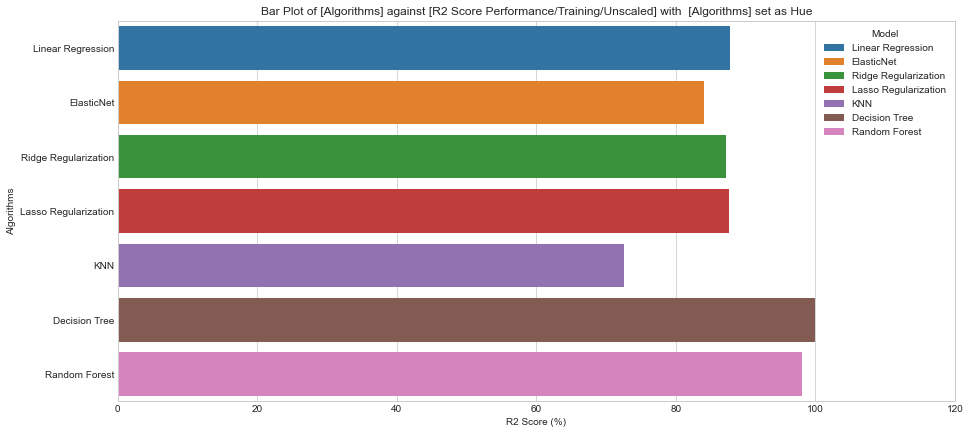

In [141]:
# Code
plt.figure(figsize=(15,7))
plt.gca().set(xlim =(0,120))
ax = sns.barplot(data = models, x = 'Score Training', y='Model', hue ='Model', dodge=False)
ax.set(xlabel='R2 Score (%)', ylabel='Algorithms', title='Bar Plot of [Algorithms] against [R2 Score Performance/Training/Unscaled] with  [Algorithms] set as Hue');

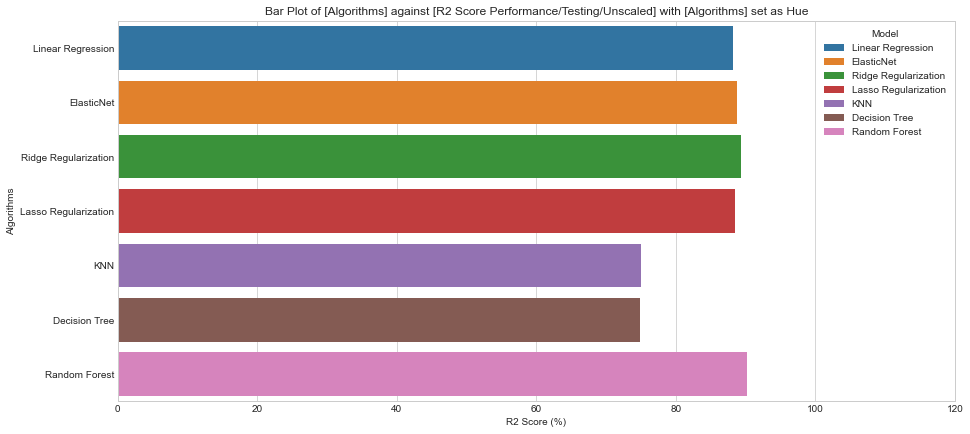

In [142]:
# Code
plt.figure(figsize=(15,7))
plt.gca().set(xlim =(0,120))
ax = sns.barplot(data = models, x = 'Score Testing', y='Model', hue ='Model', dodge=False)
ax.set(xlabel='R2 Score (%)', ylabel='Algorithms', title='Bar Plot of [Algorithms] against [R2 Score Performance/Testing/Unscaled] with [Algorithms] set as Hue');

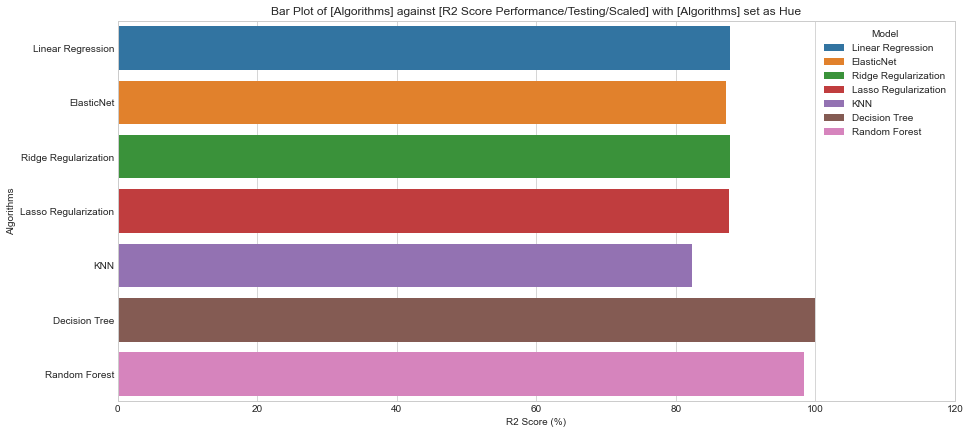

In [143]:
# Code
plt.figure(figsize=(15,7))
plt.gca().set(xlim =(0,120))
ax = sns.barplot(data = models, x = 'Score Training (Scaled)', y='Model', hue ='Model', dodge=False)
ax.set(xlabel='R2 Score (%)', ylabel='Algorithms', title='Bar Plot of [Algorithms] against [R2 Score Performance/Testing/Scaled] with [Algorithms] set as Hue');

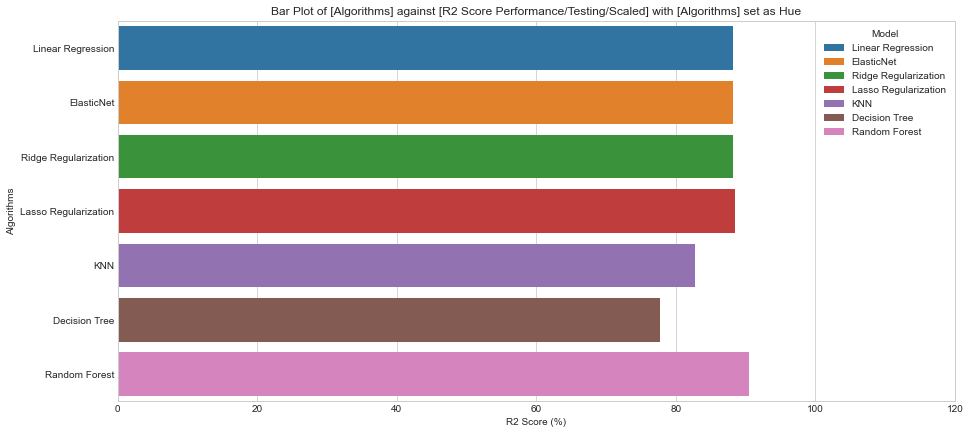

In [144]:
# Code
plt.figure(figsize=(15,7))
plt.gca().set(xlim =(0,120))
ax = sns.barplot(data = models, x = 'Score Testing (Scaled)', y = 'Model', hue ='Model', dodge=False)
ax.set(xlabel='R2 Score (%)', ylabel='Algorithms', title='Bar Plot of [Algorithms] against [R2 Score Performance/Testing/Scaled] with [Algorithms] set as Hue');

# 6.0 Hyper Tuning Analysis of ElasticNet

We will take an indepth look at our hypertuning process, utilizing the ElasticNet algorithm. I picked this algorithm because it has properties of both Lasso Regularization (L1) and Ridge Regularization (L2), so will give us more information that allows us to see how parameters across the above 3 algorithms relate.

In [145]:
# Elastic - Random Search for Hyperparameters
model = ElasticNet()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['l1_ratio'] = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1] #The extremes '0' and '1' here just result in L1 or L2 Regularization
space['alpha'] = [1, 10, 100, 1000, 10000]

# define search
search = GridSearchCV(model, space, n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

In [146]:
grid_results = pd.concat([pd.DataFrame(result.cv_results_["params"]),pd.DataFrame(result.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

# reference https://github.com/dataprofessor/code/blob/master/python/hyperparameter_tuning.ipynb

alpha  l1_ratio  Accuracy
0      1     0.000  0.811050
1      1     0.125  0.813645
2      1     0.250  0.816491
3      1     0.375  0.819635
4      1     0.500  0.823149

In [147]:
grid_contour = grid_results.groupby(['alpha','l1_ratio']).mean() # Group by Algorithm and L1 ratio
grid_contour

Accuracy
alpha l1_ratio          
1     0.000     0.811050
      0.125     0.813645
      0.250     0.816491
      0.375     0.819635
      0.500     0.823149
      0.625     0.827150
      0.750     0.831885
      0.875     0.838178
      1.000     0.852223
10    0.000     0.763456
      0.125     0.765565
      0.250     0.768176
      0.375     0.771498
      0.500     0.775879
      0.625     0.781947
      0.750     0.791004
      0.875     0.806404
      1.000     0.852427
100   0.000     0.745249
      0.125     0.745783
      0.250     0.746405
      0.375     0.747176
      0.500     0.748216
      0.625     0.749797
      0.750     0.752681
      0.875     0.760072
      1.000     0.851249
1000  0.000     0.722114
      0.125     0.724515
      0.250     0.727162
      0.375     0.730075
      0.500     0.733261
      0.625     0.736699
      0.750     0.740318
      0.875     0.744108
      1.000     0.828551
10000 0.000     0.686206
      0.125     0.687662
      0.250     0.689365
      0.375     0.691454
      0.500     0.694192
      0.625     0.698114
      0.750     0.704489
      0.875     0.717067
      1.000     0.774899

In [148]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['l1_ratio','alpha', 'Accuracy']
grid_pivot = grid_reset.pivot('l1_ratio','alpha') # Pivot the Dataframe to fit our graph
grid_pivot

Accuracy                                                    \
alpha        0.000     0.125     0.250     0.375     0.500     0.625   
l1_ratio                                                               
1         0.811050  0.813645  0.816491  0.819635  0.823149  0.827150   
10        0.763456  0.765565  0.768176  0.771498  0.775879  0.781947   
100       0.745249  0.745783  0.746405  0.747176  0.748216  0.749797   
1000      0.722114  0.724515  0.727162  0.730075  0.733261  0.736699   
10000     0.686206  0.687662  0.689365  0.691454  0.694192  0.698114   

                                        
alpha        0.750     0.875     1.000  
l1_ratio                                
1         0.831885  0.838178  0.852223  
10        0.791004  0.806404  0.852427  
100       0.752681  0.760072  0.851249  
1000      0.740318  0.744108  0.828551  
10000     0.704489  0.717067  0.774899

In [149]:
x = grid_pivot.columns.levels[1].values
ygraph = grid_pivot.index.values # I renamed y to ygraph here because it was clashing with 'y' alread defined above.
z = grid_pivot.values

In [150]:
# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='L1 Ratio')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='Alpha') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=ygraph)], layout=layout )

fig.update_layout(title='Hyperparameter tuning of Elastic Net', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.update_yaxes(type="log")
fig.show()

In [151]:
import plotly.graph_objects as go

fig = go.Figure(data= [go.Surface(z=z, y=ygraph, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning of Elastic Net',
                  scene = dict(
                    xaxis_title='L1 Ratio',
                    yaxis_title='Alpha',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,

                  margin=dict(l=65, r=50, b=65, t=90))

fig.update_yaxes(type="log")
fig.show()

# 7.0 Conclusions and Recommendations

In [152]:
correlation_df = pd.DataFrame # Create New Data Frame to assign Refined Features

In [153]:
correlation_df = pd.concat([X,y],axis=1,join='outer')

In [154]:
correlation_df.head()

garage_cond  garage_qual  fireplace_qu  functional  kitchen_qual  \
0            3            3             0           7             4   
1            3            3             3           7             4   
2            3            3             0           7             4   
3            3            3             0           7             3   
4            3            3             0           7             3   

   heating_qc  bsmt_exposure  bsmt_cond  bsmt_qual  bsmtfin_type_1  ...  \
0           5              1          3          3               6  ...   
1           5              1          3          4               6  ...   
2           3              1          3          3               6  ...   
3           4              1          3          4               1  ...   
4           3              1          4          2               1  ...   

   ext_area  bsmt_total_bath  total_bath  year_built  year_remod  \
0        44              0.0           3          34           5   
1        74              1.0           3          14          13   
2        52              1.0           1          57           3   
3       100              0.0           3           4           3   
4        59              0.0           2         110          17   

   overall_rating  pid  mo_sold  ms_subclass  saleprice  
0               6  533        3           60     130500  
1               7  531        4           60     220000  
2               5  535        1           20     109000  
3               5  916        4           60     174000  
4               6  906        3           50     138500  

[5 rows x 67 columns]

In [155]:
barplot = correlation_df.corr()[['saleprice']].sort_values(by = 'saleprice', ascending = False) # Sort Correlation Values according to Saleprice Correlation

In [156]:
barplot.reset_index(inplace = True) # Reset Index

In [157]:
barplot = barplot.iloc[1:] # Delete First row to remove Dependent Variable 'Sales Price'

In [158]:
barplot['index'] = barplot['index'].str.replace('_',' ') 
barplot['index']= barplot['index'].str.upper()

# Reference: https://www.geeksforgeeks.org/remove-spaces-from-column-names-in-pandas/

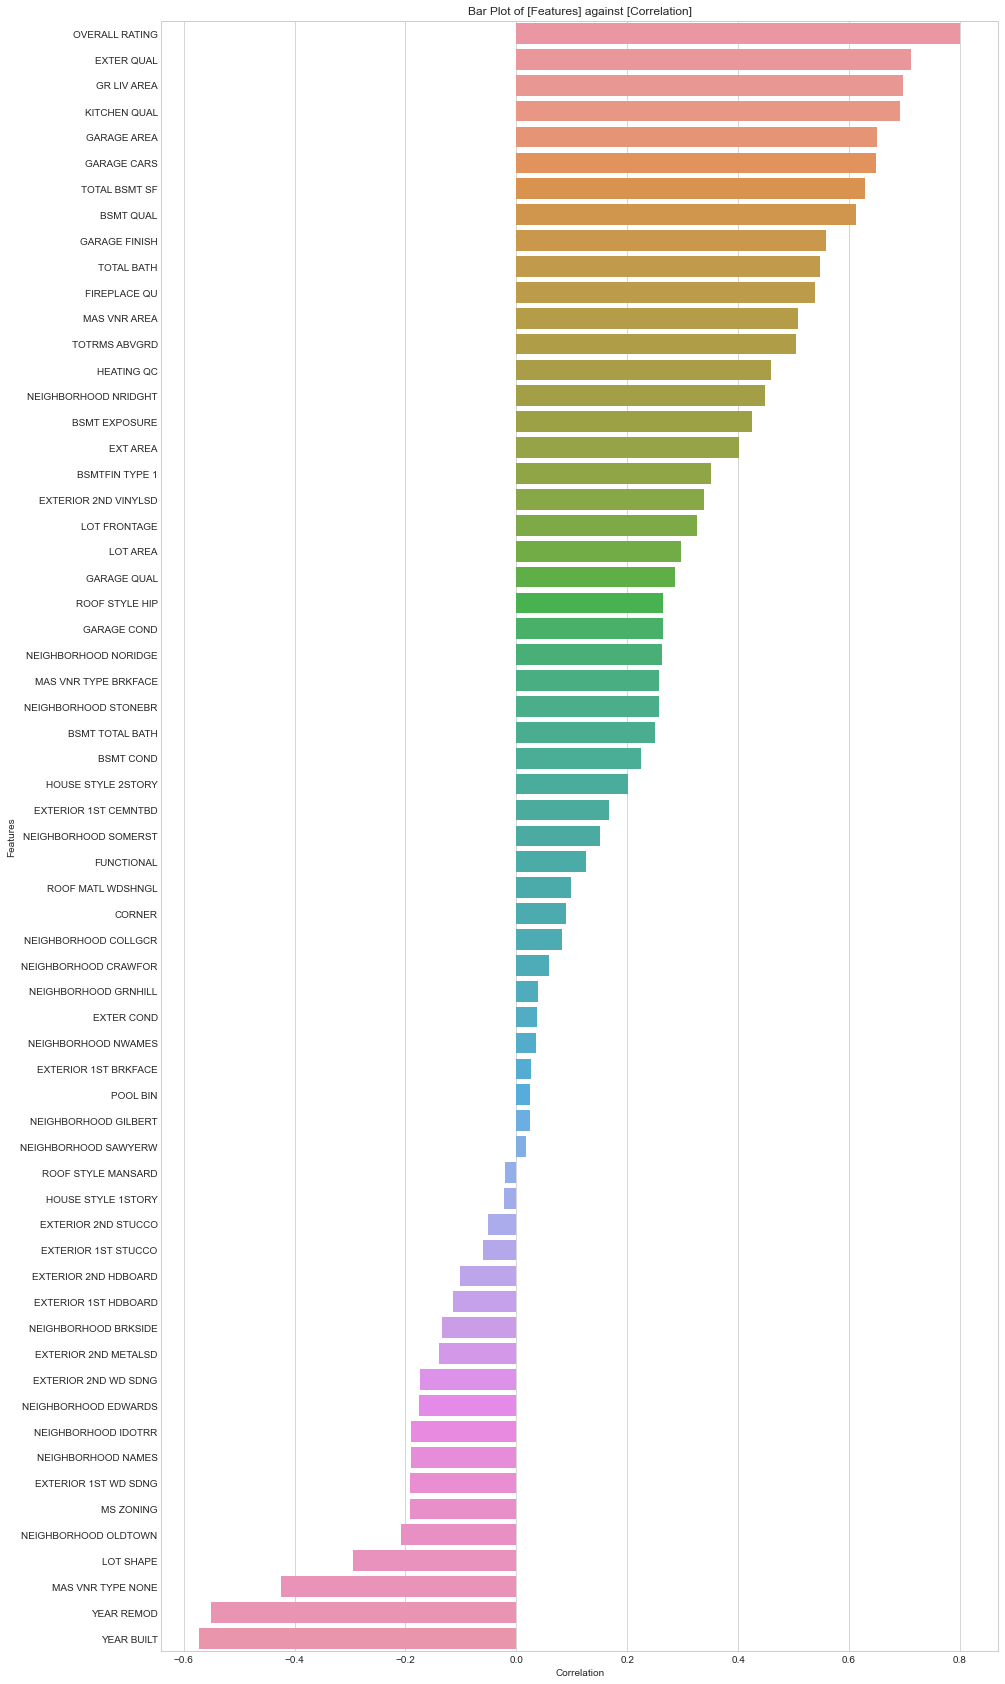

In [159]:
plt.figure(figsize=(15,30))
ax = sns.barplot(data = barplot, y = 'index', x = 'saleprice');
ax.set(xlabel='Correlation', ylabel='Features', title='Bar Plot of [Features] against [Correlation]');

# 8.0 Kaggle Submission

### 8.0.1 Clean Up Test Data to Match Train Data

In [160]:
X_fit = X

In [161]:
X_fit_kaggle = X_kaggle

In [162]:
check_train = set(X_fit.columns)
check_test = set(X_fit_kaggle.columns)

In [163]:
kaggle_columns = list(check_test.symmetric_difference(check_train))

In [169]:
del X_fit['neighborhood_GrnHill']

In [170]:
X_fit = X

In [171]:
check_train = set(X_fit.columns)
check_test = set(X_fit_kaggle.columns)

In [172]:
kaggle_columns = list(check_test.symmetric_difference(check_train))

In [173]:
X_fit_kaggle.drop(kaggle_columns, axis=1,inplace=True)

In [174]:
X_fit_kaggle.shape

(878, 65)

In [176]:
X_fit.shape

(2051, 65)

### 8.0.2 Turning In Our Prediction

In [177]:
X_train,X_testy,y_train,y_test = train_test_split(X_fit, y, random_state=42, test_size = 0.25)

#### 8.0.2.1 Linear Regression

In [178]:
lr_kaggle = LinearRegression()

In [179]:
lr_kaggle.fit(X_train, y_train)

LinearRegression()

In [180]:
kaggle_predictions = lr_kaggle.predict(X_fit_kaggle)

In [181]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['Id'] = test_df['id']
submission['SalePrice'] = kaggle_predictions # our model predictions on the test dataset
submission.head()

Id      SalePrice
0  2658  106444.996441
1  2718  156968.711598
2  2414  229123.373030
3  1989  109049.002431
4   625  173263.528133

In [182]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test_df):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (878 rows).


In [183]:
# for Kaggle submisison
submission.to_csv('/Users/macbook/Google Drive/0. Ofilispeaks Business (Mac and Cloud)/9. Data Science/0. Python/General Assembly Training/project_2-master/kaggle_predictions/linear_regression.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


#### 8.0.2.2 Linear Regression Fit to np.log(y)

In [184]:
lr_kaggle_log = LinearRegression()

In [185]:
lr_kaggle_log.fit(X, np.log(y))

LinearRegression()

In [188]:
kaggle_predictions_log = np.exp(lr_kaggle_log.predict(X_fit_kaggle))

In [189]:
# Create a submisison dataframe and append the relevant columns
submission_log = pd.DataFrame()
submission_log['Id'] = test_df['id']
submission_log['SalePrice'] = kaggle_predictions_log # our model predictions on the test dataset
submission_log.head()

Id      SalePrice
0  2658  103835.505695
1  2718  153833.010561
2  2414  225062.458155
3  1989  109515.244727
4   625  168351.679595

In [190]:
# Are our test and submission dataframes the same length?
if len(submission_log) == len(test_df):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (878 rows).


In [192]:
# for Kaggle submisison
submission_log.to_csv('/Users/macbook/Google Drive/0. Ofilispeaks Business (Mac and Cloud)/9. Data Science/0. Python/General Assembly Training/project_2-master/kaggle_predictions/linear_regression_log.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


#### 8.0.2.3 Random Forest Regressor

In [193]:
rf_kaggle = RandomForestRegressor()

In [194]:
rf_kaggle.fit(X, y)

RandomForestRegressor()

In [195]:
rf_kaggle_predictions = rf_kaggle.predict(X_fit_kaggle)

In [196]:
# Create a submisison dataframe and append the relevant columns
rf_submission = pd.DataFrame()
rf_submission['Id'] = test_df['id']
rf_submission['SalePrice'] = rf_kaggle_predictions # our model predictions on the test dataset
rf_submission.head()

Id  SalePrice
0  2658  144515.53
1  2718  150114.50
2  2414  185633.27
3  1989  113198.63
4   625  172718.54

In [197]:
# Are our test and submission dataframes the same length?
if len(rf_submission) == len(test_df):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (878 rows).


In [198]:
# for Kaggle submisison
rf_submission.to_csv('/Users/macbook/Google Drive/0. Ofilispeaks Business (Mac and Cloud)/9. Data Science/0. Python/General Assembly Training/project_2-master/kaggle_predictions/random_forest.csv', index=False)
print('Random Forest Submission CSV is ready!')

Random Forest Submission CSV is ready!


#### 8.0.2.4 Ridge Regularized

In [199]:
ridge_kaggle = Ridge(alpha = 10,
              fit_intercept= True,
              normalize= False,
              solver = 'svd')

In [200]:
# Instantiate.
sck = StandardScaler()

# Fit and transform.
Z_train_k = sck.fit_transform(X_train)

# Transform.
Z_test_k = sck.transform(X_fit_kaggle)

In [201]:
ridge_kaggle.fit(Z_train_k,y_train)

Ridge(alpha=10, solver='svd')

In [202]:
y_new = ridge_kaggle.predict(Z_test_k)

In [203]:
# Create a submisison dataframe and append the relevant columns
r_submission = pd.DataFrame()
r_submission['Id'] = test_df['id']
r_submission['SalePrice'] = y_new # our model predictions on the test dataset
r_submission.head()

Id      SalePrice
0  2658  106622.641486
1  2718  157632.021607
2  2414  229017.415459
3  1989  109960.478413
4   625  173423.529793

In [204]:
# Are our test and submission dataframes the same length?
if len(r_submission) == len(test_df):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (878 rows).


In [205]:
# for Kaggle submisison
r_submission.to_csv('/Users/macbook/Google Drive/0. Ofilispeaks Business (Mac and Cloud)/9. Data Science/0. Python/General Assembly Training/project_2-master/kaggle_predictions/ridge_regularized.csv', index=False)
print('Random Forest Submission CSV is ready!')

Random Forest Submission CSV is ready!
